In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('Rose.csv')
df.head()

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


In [6]:
df = pd.read_csv('Rose.csv', parse_dates=['YearMonth'], index_col=['YearMonth'])
df.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [76]:
df.tail()

,Rose
YearMonth,
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0
1995-06-01,40.0
1995-07-01,62.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [9]:
df.isnull().sum()

Rose    2
dtype: int64

In [49]:
df.shape

(187, 1)

In [15]:
df[df['Rose'].isnull()]

,Rose
YearMonth,
1994-07-01,NaN
1994-08-01,NaN


In [17]:
df['1994']

<ipython-input-17-5610489250d5>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['1994']


,Rose
YearMonth,
1994-01-01,30.0
1994-02-01,35.0
1994-03-01,42.0
1994-04-01,48.0
1994-05-01,44.0
1994-06-01,45.0
1994-07-01,NaN
1994-08-01,NaN
1994-09-01,46.0


In [25]:
from pylab import rcParams
rcParams['figure.figsize']=16,8

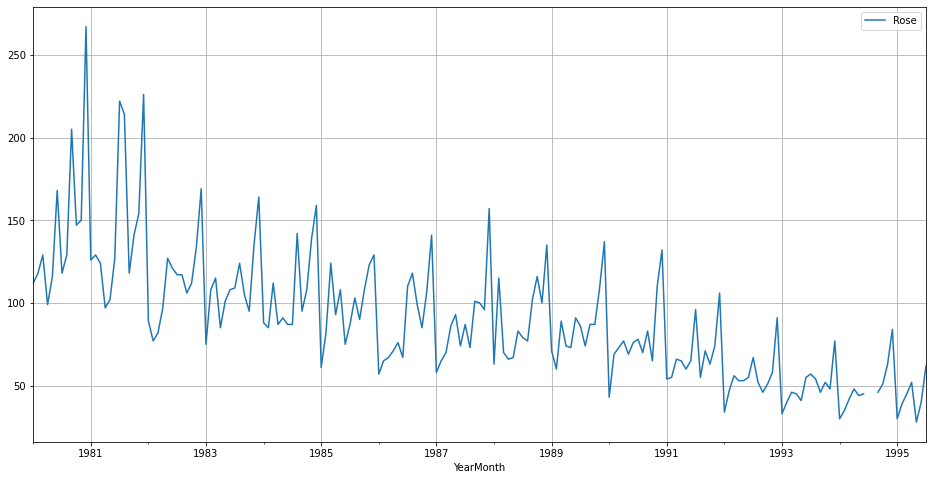

In [26]:
df.plot(grid=True);

In [45]:
df1=df.interpolate(method='spline',order=1)

In [46]:
df1['1994']

<ipython-input-46-a759c8d2eb6e>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df1['1994']


,Rose
YearMonth,
1994-01-01,30.000000
1994-02-01,35.000000
1994-03-01,42.000000
1994-04-01,48.000000
1994-05-01,44.000000
1994-06-01,45.000000
1994-07-01,46.153199
1994-08-01,47.211982
1994-09-01,46.000000


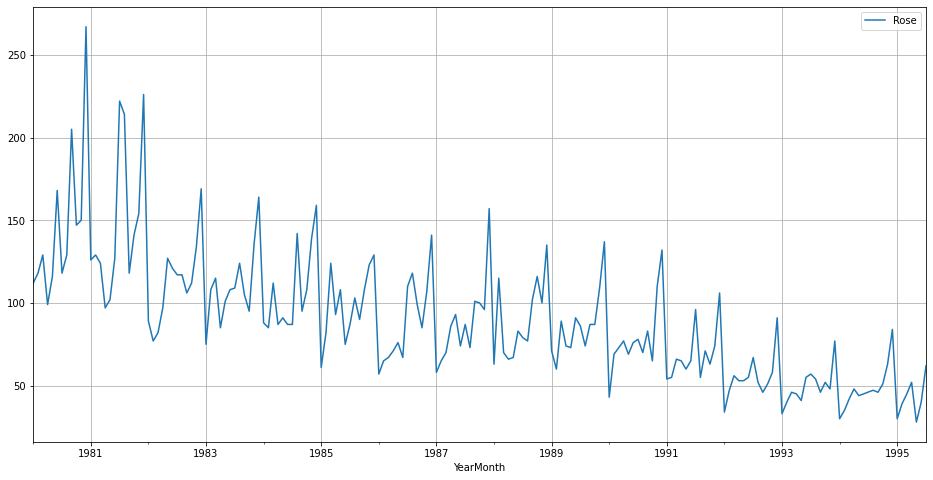

In [47]:
df1.plot(grid=True);

In [50]:
df1.shape

(187, 1)

In [52]:
df.describe()

,Rose
count,185.000000
mean,90.394595
std,39.175344
min,28.000000
25%,63.000000
50%,86.000000
75%,112.000000
max,267.000000


In [64]:
df1.describe()

,Rose
count,187.000000
mean,89.927087
std,39.224153
min,28.000000
25%,62.500000
50%,85.000000
75%,111.000000
max,267.000000


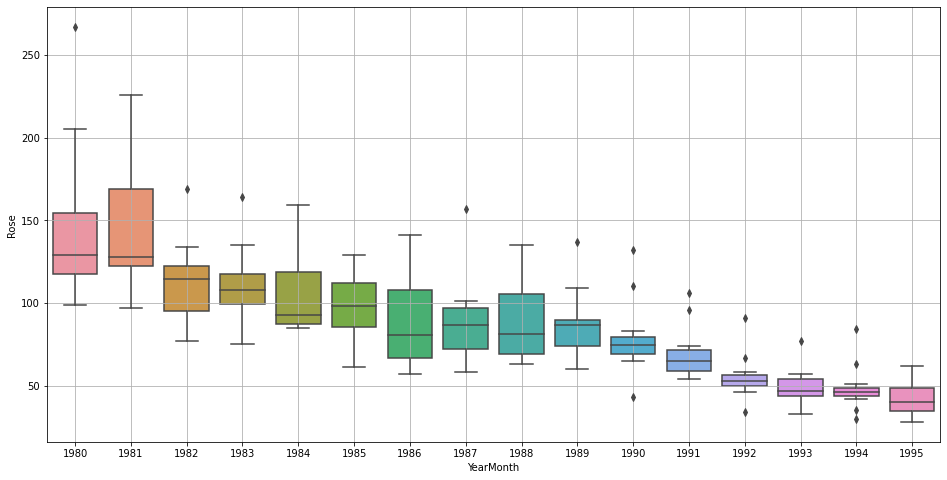

In [66]:
sns.boxplot(x = df1.index.year,y = df1['Rose'])
plt.grid();

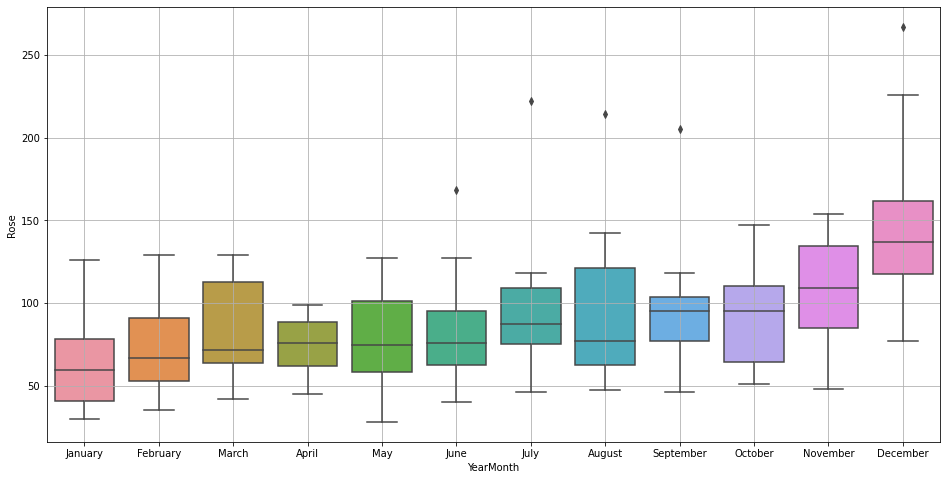

In [73]:
sns.boxplot(x = df1.index.month_name(),y = df1['Rose'])
plt.grid();

In [364]:
monthly_sales = pd.pivot_table(df1, values='Rose', index = df1.index.year, columns=df1.index.month)
monthly_sales

YearMonth,1,2,3,4,5,6,7,8,9,10,11,12
YearMonth,,,,,,,,,,,,
1980,112.0,118.0,129.0,99.0,116.0,168.0,118.000000,129.000000,205.0,147.0,150.0,267.0
1981,126.0,129.0,124.0,97.0,102.0,127.0,222.000000,214.000000,118.0,141.0,154.0,226.0
1982,89.0,77.0,82.0,97.0,127.0,121.0,117.000000,117.000000,106.0,112.0,134.0,169.0
1983,75.0,108.0,115.0,85.0,101.0,108.0,109.000000,124.000000,105.0,95.0,135.0,164.0
1984,88.0,85.0,112.0,87.0,91.0,87.0,87.000000,142.000000,95.0,108.0,139.0,159.0
1985,61.0,82.0,124.0,93.0,108.0,75.0,87.000000,103.000000,90.0,108.0,123.0,129.0
1986,57.0,65.0,67.0,71.0,76.0,67.0,110.000000,118.000000,99.0,85.0,107.0,141.0
1987,58.0,65.0,70.0,86.0,93.0,74.0,87.000000,73.000000,101.0,100.0,96.0,157.0
1988,63.0,115.0,70.0,66.0,67.0,83.0,79.000000,77.000000,102.0,116.0,100.0,135.0


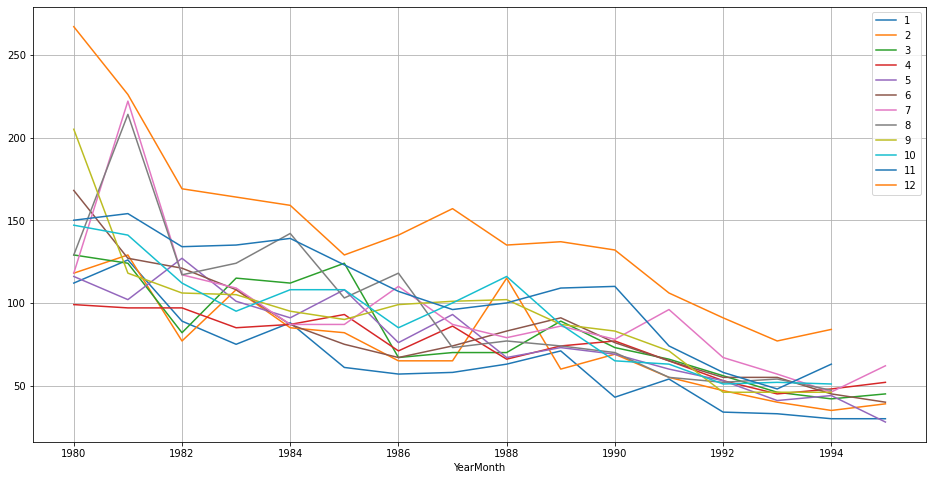

In [78]:
monthly_sales.plot()
plt.grid();
plt.legend(loc='best');

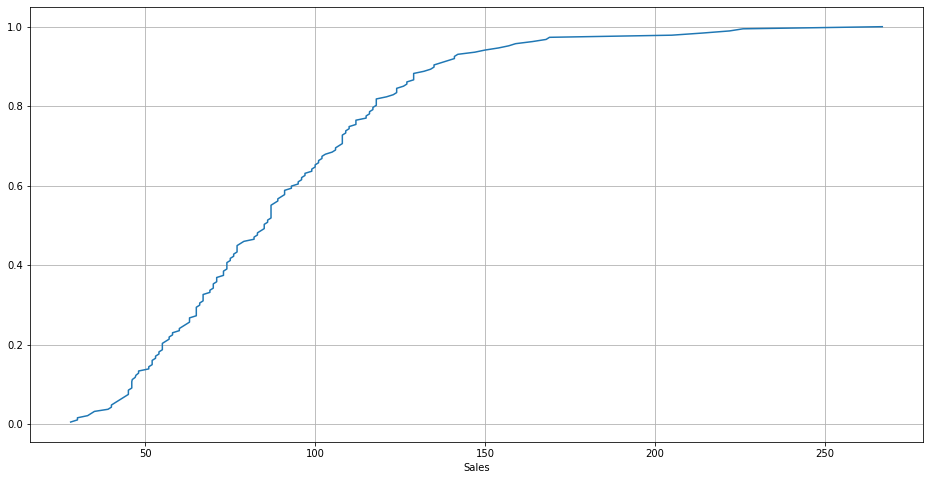

In [79]:
from statsmodels.distributions.empirical_distribution import ECDF

cdf = ECDF(df1['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

In [82]:
from statsmodels.tsa.seasonal import seasonal_decompose

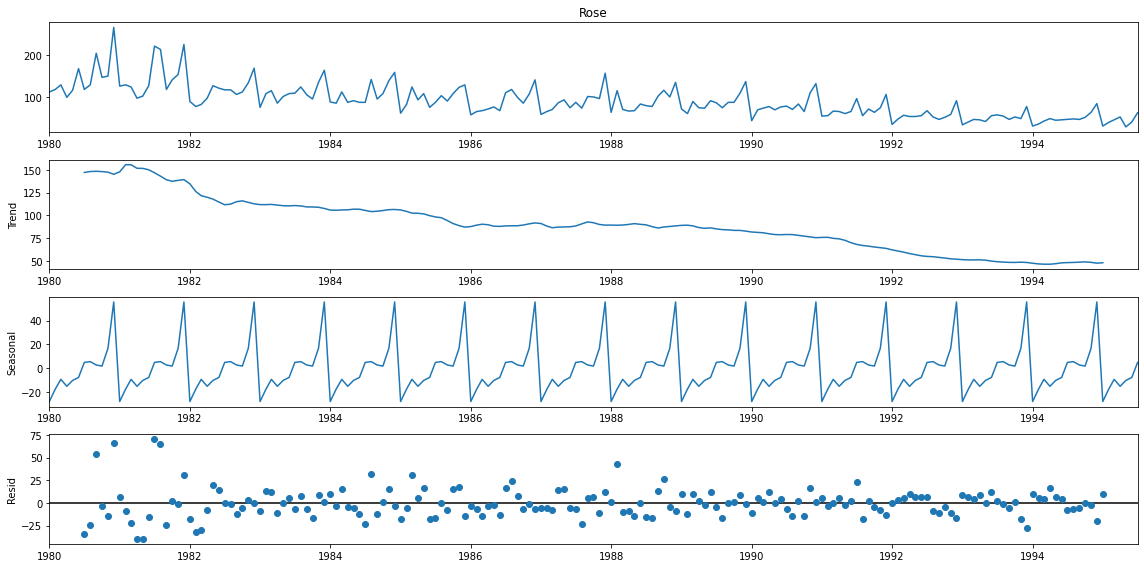

In [84]:
df1_add = seasonal_decompose(df1['Rose'], model='additive')
df1_add.plot();

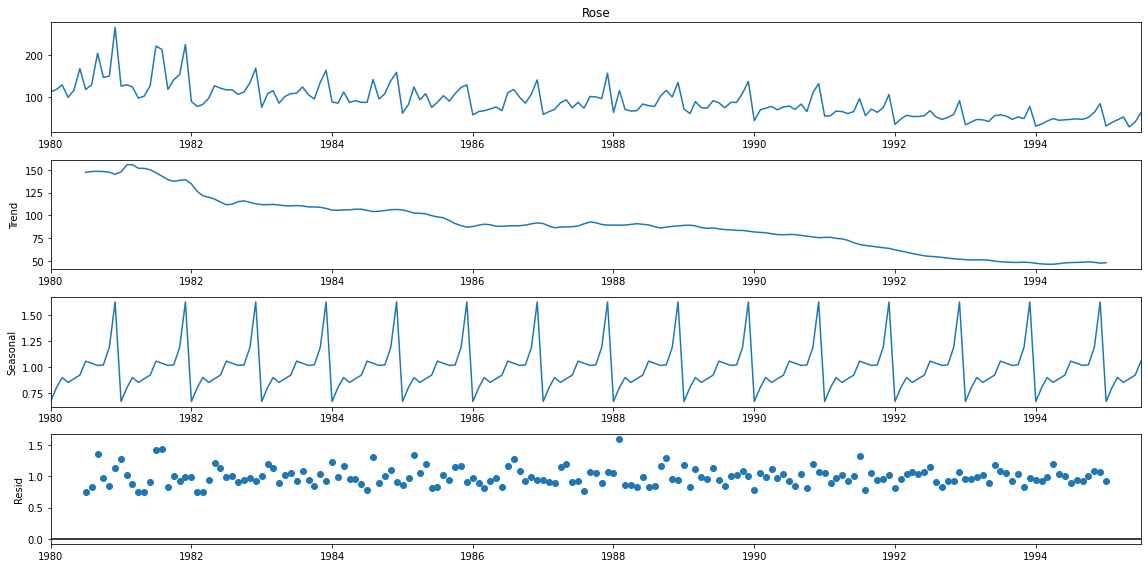

In [85]:
df1_mul = seasonal_decompose(df1['Rose'], model='multiplicative')
df1_mul.plot();

In [86]:
trend= df1_mul.trend
seasonality =df1_mul.seasonal
residual = df1_mul.resid

print('Trend','\n', trend.head(15),'\n')
print('Seasonality','\n',seasonality.head(15),'\n')
print('Residual','\n', residual.head(15),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
1981-01-01    147.750000
1981-02-01    155.625000
1981-03-01    155.541667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.669946
1980-02-01    0.806019
1980-03-01    0.900899
1980-04-01    0.853719
1980-05-01    0.889143
1980-06-01    0.923718
1980-07-01    1.058920
1980-08-01    1.037754
1980-09-01    1.017402
1980-10-01    1.022303
1980-11-01    1.192007
1980-12-01    1.628173
1981-01-01    0.669946
1981-02-01    0.806019
1981-03-01    0.900899
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.

In [87]:
train=df1[df.index.year<1991]
test=df1[df.index.year>=1991]

In [88]:
print('Train Set Size', '\n',train.shape,'\n')
print('Test Set Size', '\n', test.shape,'\n')

Train Set Size 
 (132, 1) 

Test Set Size 
 (55, 1) 



In [90]:
train.tail()

,Rose
YearMonth,
1990-08-01,70.0
1990-09-01,83.0
1990-10-01,65.0
1990-11-01,110.0
1990-12-01,132.0


In [91]:
test.head()

,Rose
YearMonth,
1991-01-01,54.0
1991-02-01,55.0
1991-03-01,66.0
1991-04-01,65.0
1991-05-01,60.0


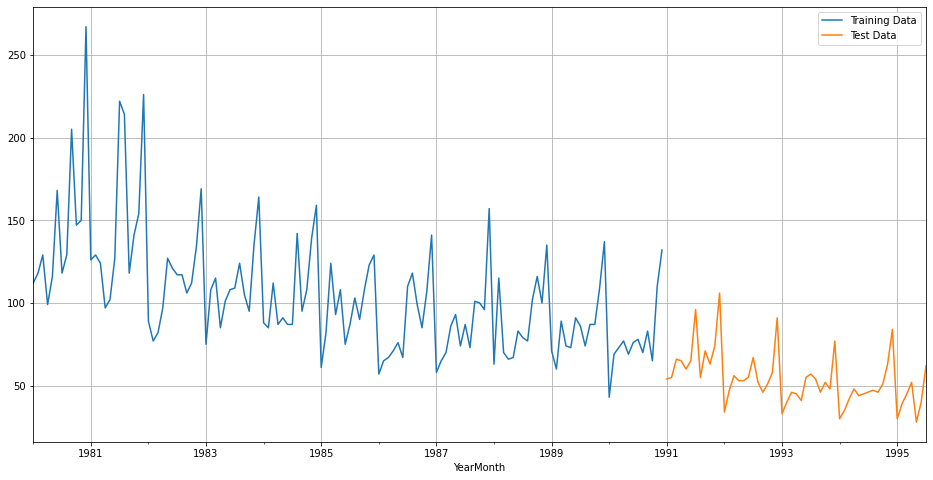

In [94]:
train['Rose'].plot()
test['Rose'].plot()
plt.grid();
plt.legend(['Training Data', 'Test Data']);
plt.show();

In [97]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [96]:
LR_train = train.copy()
LR_test = test.copy()

In [98]:
LR_train['time'] = train_time
LR_test['time'] = test_time

In [99]:
LR_test.head()

,Rose,time
YearMonth,,
1991-01-01,54.0,133
1991-02-01,55.0,134
1991-03-01,66.0,135
1991-04-01,65.0,136
1991-05-01,60.0,137


In [105]:
LR_train.head()

,Rose,time
YearMonth,,
1980-01-01,112.0,1
1980-02-01,118.0,2
1980-03-01,129.0,3
1980-04-01,99.0,4
1980-05-01,116.0,5


In [100]:
from sklearn.linear_model import LinearRegression

In [101]:
lr=LinearRegression()

In [104]:
lr.fit(LR_train[['time']], LR_train['Rose'].values)

LinearRegression()

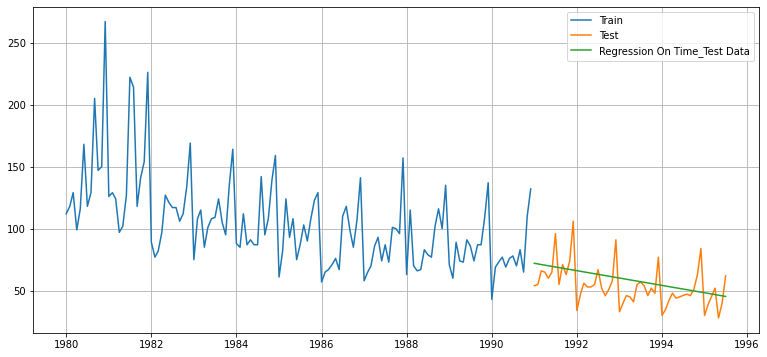

In [107]:
test_predictions_model1         = lr.predict(LR_test[['time']])
LR_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LR_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [108]:
from sklearn import metrics

In [109]:
rmse_test= metrics.mean_squared_error(test['Rose'], test_predictions_model1, squared=False)
print('For regressionOntime forecast on the test data, RMSE is %3.3f'%(rmse_test))

For regressionOntime forecast on the test data, RMSE is 15.255


In [110]:
resultRose = pd.DataFrame({'RMSE': [rmse_test]}, index=['RegressionOnTime'])
resultRose

,RMSE
RegressionOnTime,15.255492


In [111]:
Ntrain=train.copy()
Ntest=test.copy()

In [113]:
Ntest['Naive']= np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
Ntest['Naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: Naive, dtype: float64

Text(0.5, 1.0, 'Naive Forecaast for Rose Wine')

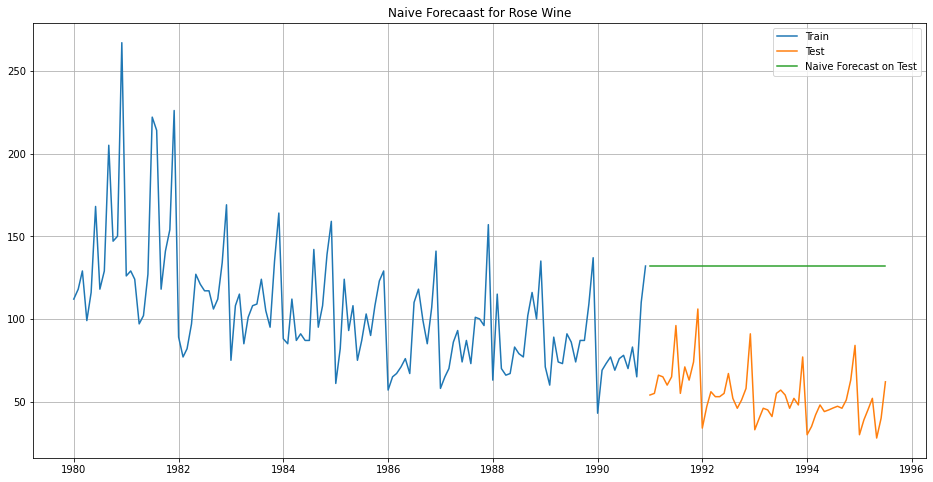

In [116]:
plt.plot(Ntrain['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(Ntest['Naive'], label='Naive Forecast on Test')
plt.legend(loc='best')
plt.grid();
plt.title('Naive Forecaast for Rose Wine')

In [118]:
rmse_test2 = metrics.mean_squared_error(test['Rose'], Ntest['Naive'], squared=False)
print('For regressionOnTime on the test data, RMSE is %3.3f' %(rmse_test2))

For regressionOnTime on the test data, RMSE is 79.672


In [119]:
resultNaive = pd.DataFrame({'RMSE': rmse_test2},index=['Naive Model'])
resultRose = pd.concat([resultRose, resultNaive])
resultRose

,RMSE
RegressionOnTime,15.255492
Naive Model,79.672475


In [120]:
SA_train = train.copy()
SA_test = test.copy()

In [121]:
SA_test['forecast'] =train['Rose'].mean()
SA_test.head()

,Rose,forecast
YearMonth,,
1991-01-01,54.0,104.939394
1991-02-01,55.0,104.939394
1991-03-01,66.0,104.939394
1991-04-01,65.0,104.939394
1991-05-01,60.0,104.939394


Text(0.5, 1.0, 'Simple Average Forecast for Rose Wine')

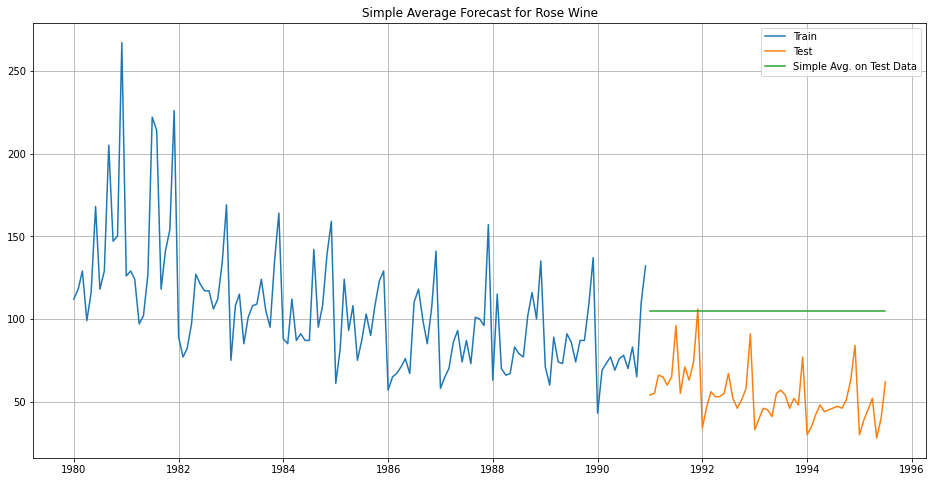

In [365]:
plt.plot(SA_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(SA_test['forecast'], label='Simple Avg. on Test Data')
plt.legend(loc='best')
plt.grid();
plt.title('Simple Average Forecast for Rose Wine')

In [123]:
rmse_test3 = metrics.mean_squared_error(test['Rose'], SA_test['forecast'],squared=False)
print('Forecast for Simple Avg. on Test Data RMSE is %3.3f' %(rmse_test3))

Forecast for Simple Avg. on Test Data RMSE is 53.413


In [125]:
results = pd.DataFrame({'RMSE': rmse_test3}, index=['Simple Average Model'])

resultRose = pd.concat([resultRose, results])
resultRose

,RMSE
RegressionOnTime,15.255492
Naive Model,79.672475
Simple Average Model,53.413298


In [128]:
MA = df1.copy()
MA.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [130]:
MA['T_2'] = MA['Rose'].rolling(2).mean()
MA['T_4'] = MA['Rose'].rolling(4).mean()
MA['T_6'] = MA['Rose'].rolling(6).mean()
MA['T_9'] = MA['Rose'].rolling(9).mean()

MA.head(10)

,Rose,T_2,T_4,T_6,T_9
YearMonth,,,,,
1980-01-01,112.0,NaN,NaN,NaN,NaN
1980-02-01,118.0,115.0,NaN,NaN,NaN
1980-03-01,129.0,123.5,NaN,NaN,NaN
1980-04-01,99.0,114.0,114.50,NaN,NaN
1980-05-01,116.0,107.5,115.50,NaN,NaN
1980-06-01,168.0,142.0,128.00,123.666667,NaN
1980-07-01,118.0,143.0,125.25,124.666667,NaN
1980-08-01,129.0,123.5,132.75,126.500000,NaN
1980-09-01,205.0,167.0,155.00,139.166667,132.666667


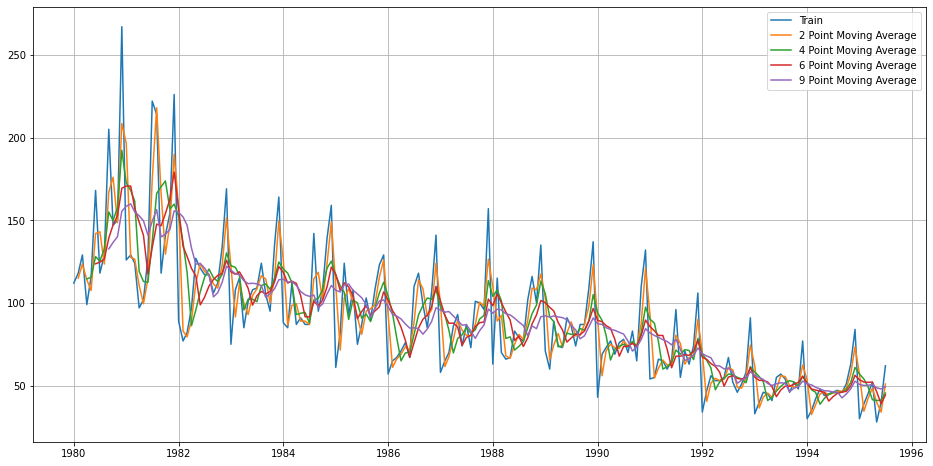

In [132]:
plt.plot(MA['Rose'], label='Train')
plt.plot(MA['T_2'], label='2 Point Moving Average')
plt.plot(MA['T_4'], label='4 Point Moving Average')
plt.plot(MA['T_6'],label = '6 Point Moving Average')
plt.plot(MA['T_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [133]:
MA_train = MA[MA.index.year<1991]
MA_test = MA[MA.index.year>=1991]

In [134]:
MA_test.head()

,Rose,T_2,T_4,T_6,T_9
YearMonth,,,,,
1991-01-01,54.0,93.0,90.25,85.666667,81.888889
1991-02-01,55.0,54.5,87.75,83.166667,80.333333
1991-03-01,66.0,60.5,76.75,80.333333,79.222222
1991-04-01,65.0,65.5,60.00,80.333333,77.777778
1991-05-01,60.0,62.5,61.50,72.000000,76.666667


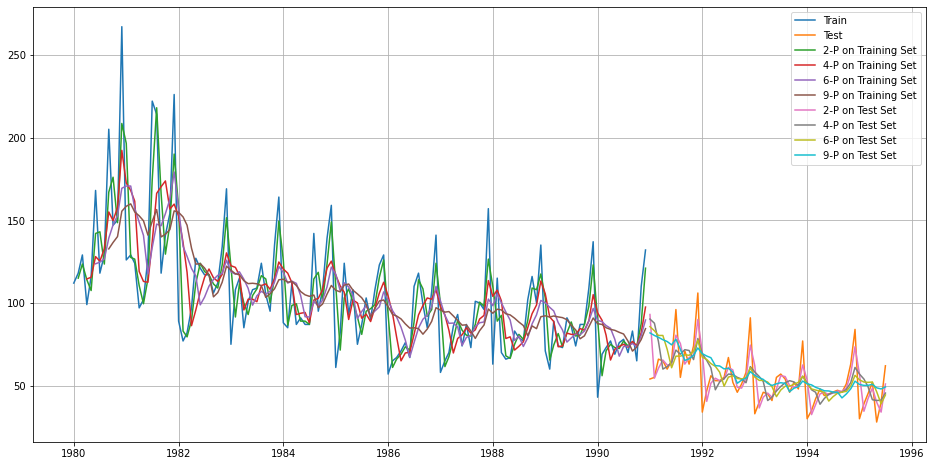

In [136]:
plt.plot(MA_train['Rose'],label='Train')
plt.plot(MA_test['Rose'],label='Test')

plt.plot(MA_train['T_2'], label = '2-P on Training Set' )
plt.plot(MA_train['T_4'], label = '4-P on Training Set' )
plt.plot(MA_train['T_6'], label = '6-P on Training Set' )
plt.plot(MA_train['T_9'], label = '9-P on Training Set' )

plt.plot(MA_test['T_2'], label = '2-P on Test Set' )
plt.plot(MA_test['T_4'], label = '4-P on Test Set' )
plt.plot(MA_test['T_6'], label = '6-P on Test Set' )
plt.plot(MA_test['T_9'], label = '9-P on Test Set' )
plt.legend(loc='best')
plt.grid()
plt.show();

In [138]:
## rmse_test4_T_2 = metrics.mean_squared_error(test['Rose'], MA_test['T_2'], squared=False)
print('For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f' %(rmse_test4_T_2))

rmse_test4_T_4 = metrics.mean_squared_error(test['Rose'], MA_test['T_4'], squared=False)
print('For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f' %(rmse_test4_T_4))

rmse_test4_T_6 = metrics.mean_squared_error(test['Rose'], MA_test['T_6'], squared=False)
print('For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f' %(rmse_test4_T_6))

rmse_test4_T_9 = metrics.mean_squared_error(test['Rose'], MA_test['T_9'], squared=False)
print('For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f' %(rmse_test4_T_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.530
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.444
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.555
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.722


In [139]:
resultsMA = pd.DataFrame({'RMSE': [rmse_test4_T_2, rmse_test4_T_4, rmse_test4_T_6,rmse_test4_T_9]},
                        index=['2-P Moving Average','4-P Moving Average','6-P Moving Average',
                              '9-P Moving Average'])
resultRose = pd.concat([resultRose, resultsMA])
resultRose

,RMSE
RegressionOnTime,15.255492
Naive Model,79.672475
Simple Average Model,53.413298
2-P Moving Average,11.529985
4-P Moving Average,14.444375
6-P Moving Average,14.554986
9-P Moving Average,14.721520


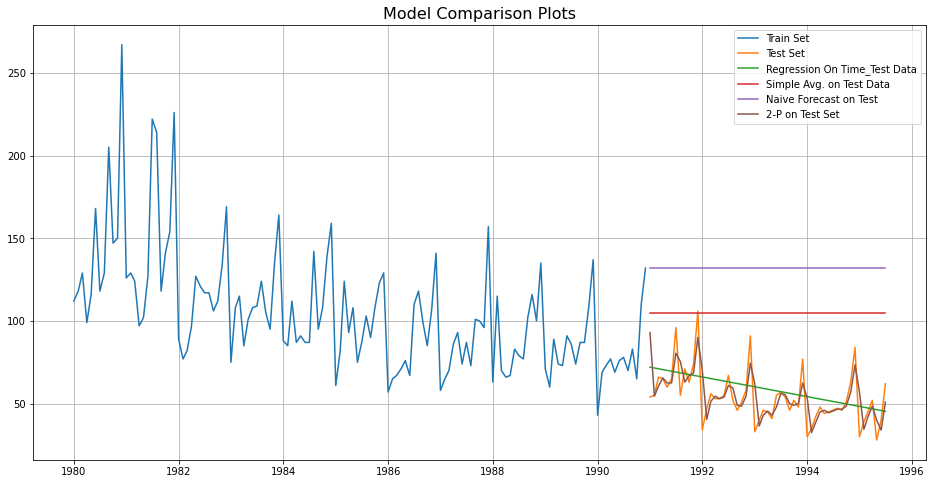

In [145]:
plt.plot(train['Rose'], label = 'Train Set')
plt.plot(test['Rose'], label = 'Test Set')

plt.plot(LR_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(SA_test['forecast'], label='Simple Avg. on Test Data')

plt.plot(Ntest['Naive'], label='Naive Forecast on Test')

plt.plot(MA_test['T_2'], label = '2-P on Test Set' )

plt.legend(loc='best')
plt.title('Model Comparison Plots', fontsize=16)
plt.grid()
plt.show();

In [147]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [148]:
SES_train = train.copy()
SES_test = test.copy()

In [149]:
model_SES=SimpleExpSmoothing(SES_train['Rose'])

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [150]:
model_SES_autofit = model_SES.fit(optimized=True)

In [151]:
model_SES_autofit.params

{'smoothing_level': 0.09874965736868566,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.3870168227416,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [152]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


,Rose,predict
YearMonth,,
1991-01-01,54.0,87.104992
1991-02-01,55.0,87.104992
1991-03-01,66.0,87.104992
1991-04-01,65.0,87.104992
1991-05-01,60.0,87.104992


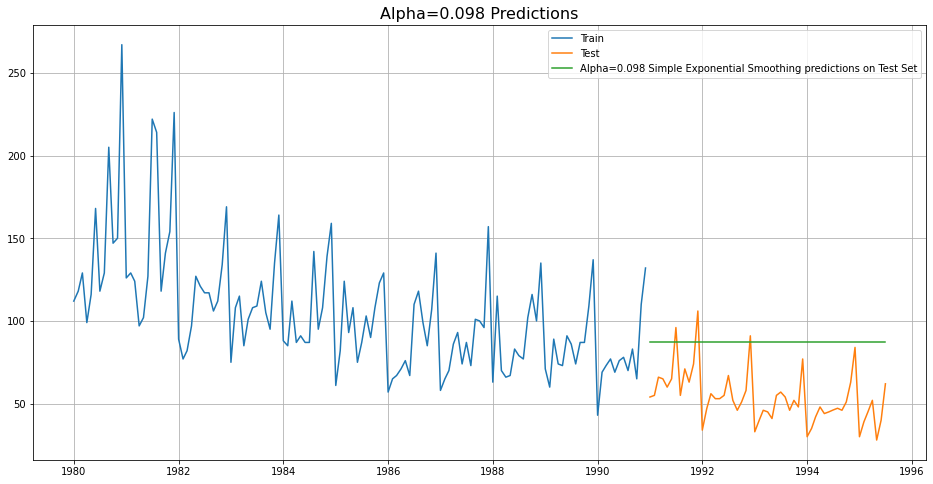

In [155]:
plt.plot(SES_train['Rose'], label='Train') 
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label = 'Alpha=0.098 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha=0.098 Predictions', fontsize=16)
plt.show();

In [157]:
rmse_SES = metrics.mean_squared_error(SES_test['Rose'], SES_test['predict'], squared=False)
print('For Alpha=0.098 simple Exponential Smoothing forecast on test data, RMSE is %3.3f' %(rmse_SES))

For Alpha=0.098 simple Exponential Smoothing forecast on test data, RMSE is 36.748


In [158]:
resultsSES = pd.DataFrame({'RMSE': rmse_SES}, index=['Alpha=0.098 Simple Exp-Smoothing'])

resultRose = pd.concat([resultRose, resultsSES])
resultRose

,RMSE
RegressionOnTime,15.255492
Naive Model,79.672475
Simple Average Model,53.413298
2-P Moving Average,11.529985
4-P Moving Average,14.444375
6-P Moving Average,14.554986
9-P Moving Average,14.721520
Alpha=0.098 Simple Exp-Smoothing,36.748398


In [ ]:
#Checkinhg for Alhpa values

In [161]:
ResultAlpha = pd.DataFrame({'Alpha':[], 'Train RMSE': [], 'Test RMSE':[]})
ResultAlpha

,Alpha,Train RMSE,Test RMSE


In [168]:
for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(test))
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Rose'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict',i],squared=False)
    
    ResultAlpha = ResultAlpha.append({'Alpha':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\b

In [170]:
ResultAlpha.sort_values(by=['Test RMSE'], ascending=True)

,Alpha,Train RMSE,Test RMSE
0,0.1,31.815610,36.780195
1,0.2,31.979391,41.314129
2,0.3,32.470164,47.457298
3,0.4,33.035130,53.720147
4,0.5,33.682839,59.594772
5,0.6,34.441171,64.924484
6,0.7,35.323261,69.651533
7,0.8,36.334596,73.727504
8,0.9,37.482782,77.092898


In [171]:
DES_train=train.copy()
DES_test=test.copy()

In [177]:
model_DES = Holt(DES_train['Rose'])

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [178]:
model_DES_autofit=model_DES.fit()

In [179]:
model_DES_autofit.params

{'smoothing_level': 3.5220526898758884e-07,
 'smoothing_trend': 6.787355341368133e-08,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 137.88052643364296,
 'initial_trend': -0.4939450127043623,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [187]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test))

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [188]:
DES_test['predict'].head()

YearMonth
1991-01-01    72.185835
1991-02-01    71.691890
1991-03-01    71.197945
1991-04-01    70.704000
1991-05-01    70.210055
Name: predict, dtype: float64

In [189]:
rmse_DES=metrics.mean_squared_error(DES_test['Rose'], DES_test['predict'], squared=False)
rmse_DES

15.297750373952555

In [211]:
resultsDES1 = pd.DataFrame({'Alpha':[], 'Beta':[], 'Train RMSE':[], 'Test RMSE':[]})
resultsDES1

,Alpha,Beta,Train RMSE,Test RMSE


In [214]:
for i in np.arange(0,0.1,0.01):
    for j in np.arange(0,0.1,0.01):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test))
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',i,j],squared=False)
        
        resultsDES1 = resultsDES1.append({'Alpha':i,'Beta':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\b

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\b

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\b

In [215]:
resultsDES1.sort_values(by='Test RMSE',ascending=True).head()

,Alpha,Beta,Train RMSE,Test RMSE
165,0.04,0.04,61.520373,14.906969
174,0.05,0.03,57.563568,15.561841
157,0.03,0.06,66.475286,16.461810
164,0.04,0.03,67.637624,17.942491
175,0.05,0.04,52.885737,19.718029


In [216]:
DES_test['predict', 0.04, 0.04]

YearMonth
1991-01-01    64.858572
1991-02-01    64.330725
1991-03-01    63.802879
1991-04-01    63.275033
1991-05-01    62.747186
1991-06-01    62.219340
1991-07-01    61.691493
1991-08-01    61.163647
1991-09-01    60.635800
1991-10-01    60.107954
1991-11-01    59.580107
1991-12-01    59.052261
1992-01-01    58.524414
1992-02-01    57.996568
1992-03-01    57.468722
1992-04-01    56.940875
1992-05-01    56.413029
1992-06-01    55.885182
1992-07-01    55.357336
1992-08-01    54.829489
1992-09-01    54.301643
1992-10-01    53.773796
1992-11-01    53.245950
1992-12-01    52.718103
1993-01-01    52.190257
1993-02-01    51.662411
1993-03-01    51.134564
1993-04-01    50.606718
1993-05-01    50.078871
1993-06-01    49.551025
1993-07-01    49.023178
1993-08-01    48.495332
1993-09-01    47.967485
1993-10-01    47.439639
1993-11-01    46.911792
1993-12-01    46.383946
1994-01-01    45.856100
1994-02-01    45.328253
1994-03-01    44.800407
1994-04-01    44.272560
1994-05-01    43.744714
1994-0

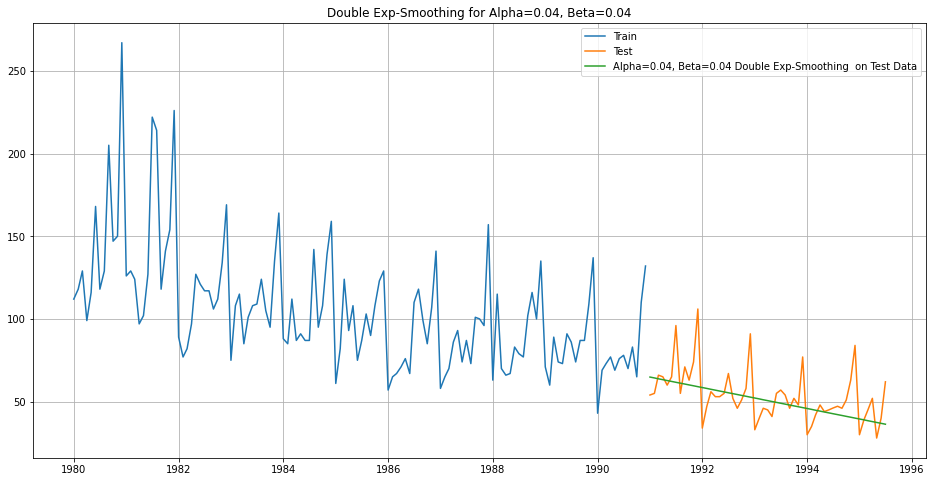

In [218]:
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_test['predict', 0.04, 0.04], label = 'Alpha=0.04, Beta=0.04 Double Exp-Smoothing  on Test Data')

plt.legend(loc='best')
plt.title('Double Exp-Smoothing for Alpha=0.04, Beta=0.04')
plt.grid()
plt.show();

In [221]:
results_DES = pd.DataFrame({'RMSE': [resultsDES1.sort_values(by=['Test RMSE']).values[0][3]]}, index=['Alpha=0.04, Beta=0.04, Double Exp-Smoothing'])

resultRose = pd.concat([resultRose, results_DES])
resultRose

,RMSE
RegressionOnTime,15.255492
Naive Model,79.672475
Simple Average Model,53.413298
2-P Moving Average,11.529985
4-P Moving Average,14.444375
6-P Moving Average,14.554986
9-P Moving Average,14.721520
Alpha=0.098 Simple Exp-Smoothing,36.748398
"Alpha=0.04, Beta=0.04, Double Exp-Smoothing",14.906969


In [222]:
TES_train = train.copy()
TES_test = test.copy()

In [229]:
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='additive', seasonal='multiplicative')

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [230]:
model_TES_autofit= model_TES.fit()

In [231]:
model_TES_autofit.params

{'smoothing_level': 0.06510835164907584,
 'smoothing_trend': 0.0526680481502012,
 'smoothing_seasonal': 4.344025903267054e-06,
 'damping_trend': nan,
 'initial_level': 59.16824915075656,
 'initial_trend': -0.3671450798562006,
 'initial_seasons': array([1.90546121, 2.16212462, 2.36216206, 2.06486336, 2.32130366,
        2.5309818 , 2.78210303, 2.95869941, 2.80670038, 2.74618658,
        3.2011441 , 4.41498767]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [233]:
TES_predict = model_TES_autofit.forecast(len(test))
TES_predict.head()

1991-01-01    56.728590
1991-02-01    64.177618
1991-03-01    69.905043
1991-04-01    60.923227
1991-05-01    68.282744
Freq: MS, dtype: float64

In [234]:
metrics.mean_squared_error(TES_test['Rose'], TES_predict,squared=False)

21.037637442376152

In [239]:
resultsTES_1 = pd.DataFrame({'Alpha':[],'Beta':[],'Gamma':[],'Train RMSE':[],'Test RMSE': []})
resultsTES_1

,Alpha,Beta,Gamma,Train RMSE,Test RMSE


In [240]:
for i in np.arange(0,1.1,0.1):
    for j in np.arange(0,1.1,0.1):
        for k in np.arange(0,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',i,j,k],squared=False)
            
            resultsTES_1 = resultsTES_1.append({'Alpha':i,'Beta':j,'Gamma':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\b

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\b

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\b

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\b

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\b

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\b

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\b

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\b

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\b

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\b

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\b

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\b

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\b

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\b

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\b

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\b

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\b

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\b

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\b

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\b

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\b

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\b

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\b

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\b

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\b

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\b

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\b

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\b

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\b

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\b

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\b

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\b

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\b

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\b

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\b

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\b

In [243]:
resultsTES_1.sort_values(by=['Test RMSE'], ascending=True)

,Alpha,Beta,Gamma,Train RMSE,Test RMSE
145,0.1,0.2,0.2,24.365597,9.628012e+00
146,0.1,0.2,0.3,23.969166,9.923487e+00
144,0.1,0.2,0.1,25.529854,9.940633e+00
300,0.2,0.5,0.3,27.631767,1.005302e+01
310,0.2,0.6,0.2,28.289836,1.005936e+01
...,...,...,...,...,...
1293,1.0,0.7,0.6,2081.266799,9.860190e+05
358,0.2,1.0,0.6,1690.195096,1.217531e+06
808,0.6,0.7,0.5,56794.689317,1.793268e+06
1292,1.0,0.7,0.5,2931.869729,2.819593e+06


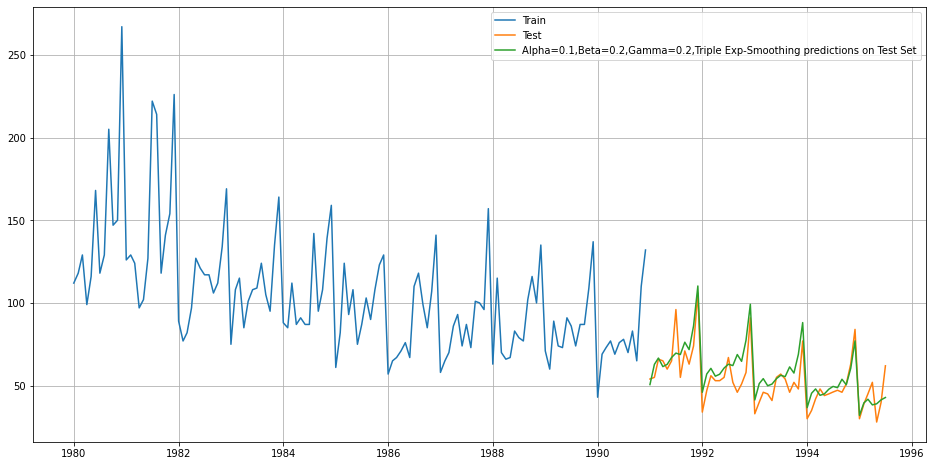

In [244]:
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_test['predict', 0.1, 0.2, 0.2], label='Alpha=0.1,Beta=0.2,Gamma=0.2,Triple Exp-Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [245]:
results_TES = pd.DataFrame({'RMSE': [resultsTES_1.sort_values(by=['Test RMSE']).values[0][4]]}, 
                           index=['Alpha=0.1, Beta=0.2,Gamma=0.2 Triple Exp-Smoothing'])

resultRose = pd.concat([resultRose, results_TES])
resultRose

,RMSE
RegressionOnTime,15.255492
Naive Model,79.672475
Simple Average Model,53.413298
2-P Moving Average,11.529985
4-P Moving Average,14.444375
6-P Moving Average,14.554986
9-P Moving Average,14.721520
Alpha=0.098 Simple Exp-Smoothing,36.748398
"Alpha=0.04, Beta=0.04, Double Exp-Smoothing",14.906969
"Alpha=0.1, Beta=0.2,Gamma=0.2 Triple Exp-Smoothing",9.628012


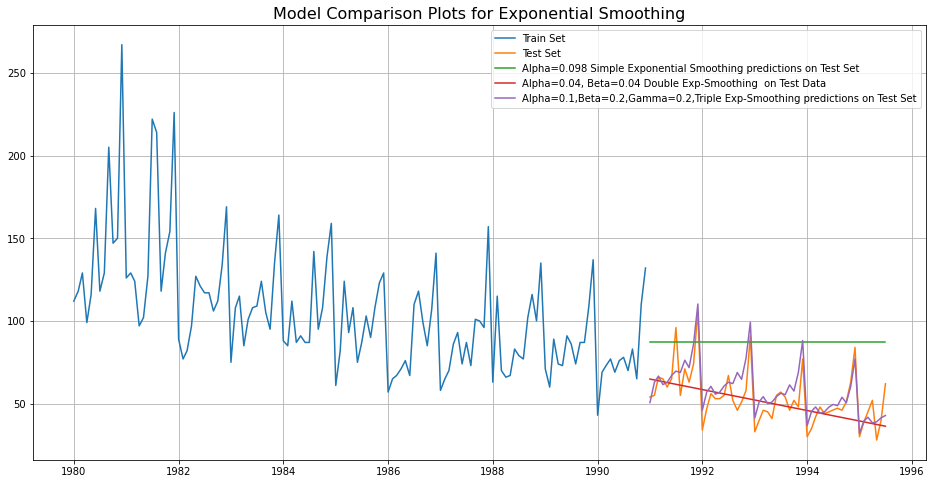

In [246]:
plt.plot(train['Rose'], label = 'Train Set')
plt.plot(test['Rose'], label = 'Test Set')

plt.plot(SES_test['predict'], label = 'Alpha=0.098 Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_test['predict', 0.04, 0.04], label = 'Alpha=0.04, Beta=0.04 Double Exp-Smoothing  on Test Data')

plt.plot(TES_test['predict', 0.1, 0.2, 0.2], label='Alpha=0.1,Beta=0.2,Gamma=0.2,Triple Exp-Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.title('Model Comparison Plots for Exponential Smoothing', fontsize=16)
plt.grid()
plt.show();

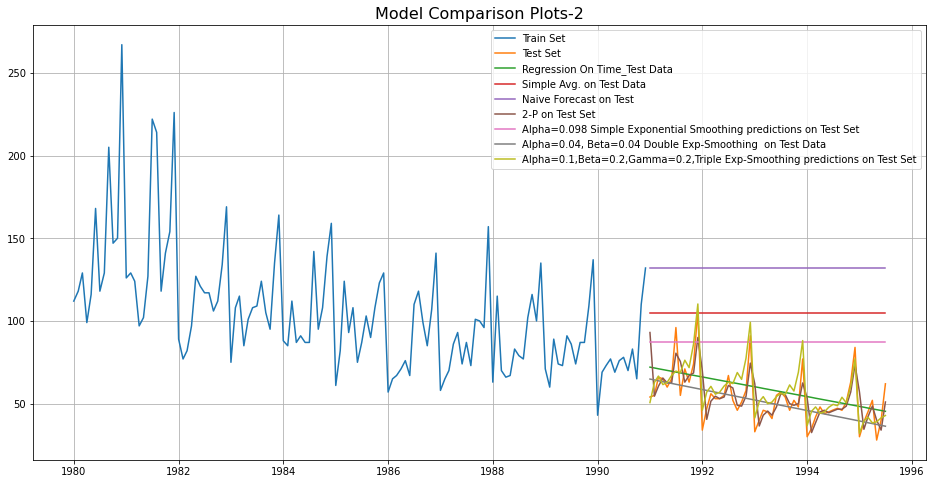

In [247]:
plt.plot(train['Rose'], label = 'Train Set')
plt.plot(test['Rose'], label = 'Test Set')

plt.plot(LR_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(SA_test['forecast'], label='Simple Avg. on Test Data')

plt.plot(Ntest['Naive'], label='Naive Forecast on Test')

plt.plot(MA_test['T_2'], label = '2-P on Test Set' )

plt.plot(SES_test['predict'], label = 'Alpha=0.098 Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_test['predict', 0.04, 0.04], label = 'Alpha=0.04, Beta=0.04 Double Exp-Smoothing  on Test Data')

plt.plot(TES_test['predict', 0.1, 0.2, 0.2], label='Alpha=0.1,Beta=0.2,Gamma=0.2,Triple Exp-Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.title('Model Comparison Plots-2', fontsize=16)
plt.grid()
plt.show();

In [248]:
#ARIMA/SARIMA Models

In [252]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [253]:
dftest = adfuller(df1,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -2.240
DF test p-value is 0.46754944706302054
Number of lags used 13


In [ ]:
#Not stationary

In [254]:
dftest1 = adfuller(df1.diff().dropna(),regression ='ct')
print('DF t-stats is %3.3f' %dftest1[0])
print('DF test p-value is', dftest1[1])
print('Number of lags used', dftest1[2])

DF t-stats is -8.164
DF test p-value is 2.9904329878165705e-11
Number of lags used 12


In [255]:
#Now it is stationary

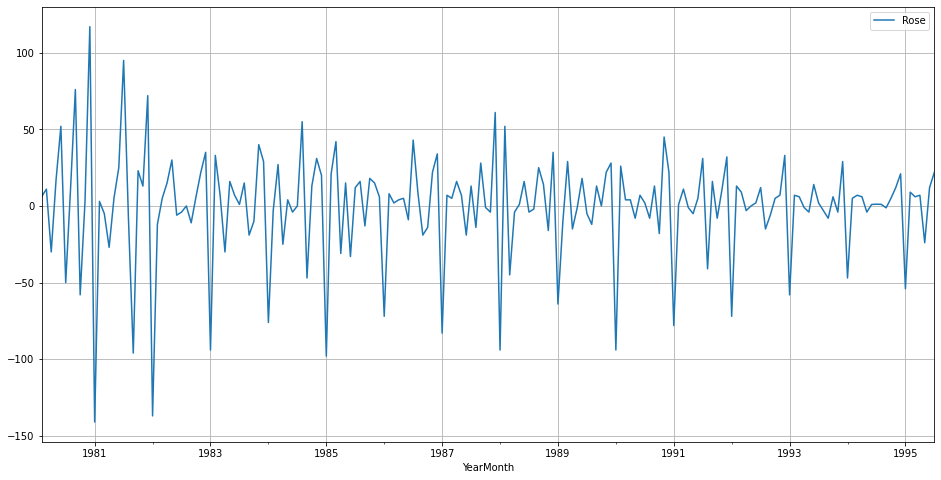

In [256]:
df1.diff().dropna().plot(grid=True);

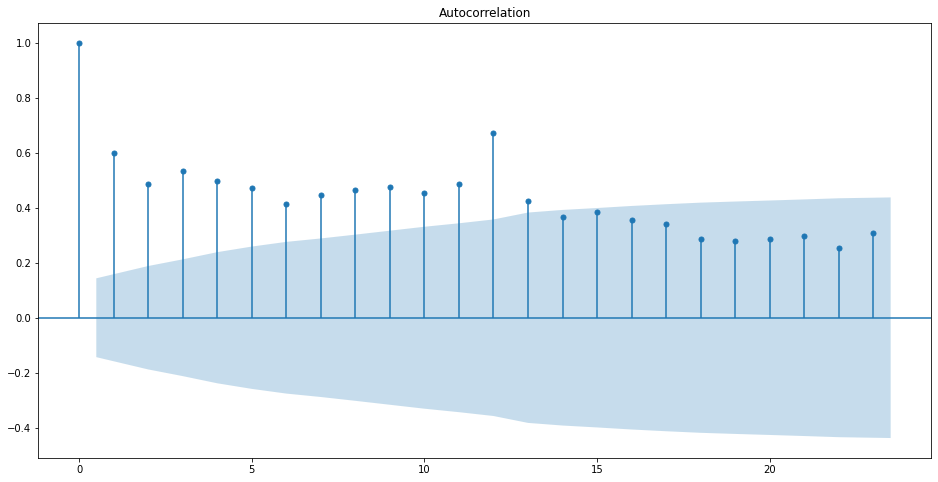

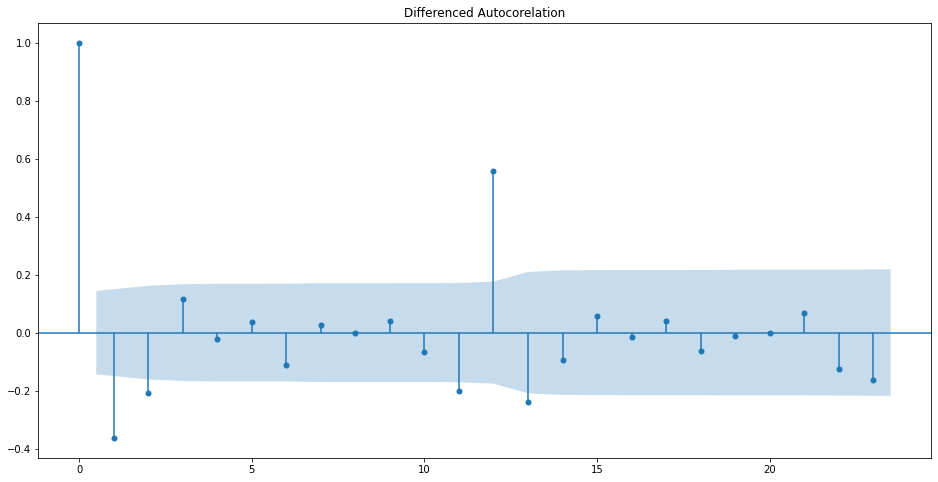

In [259]:
plot_acf(df1, alpha=0.05);
plot_acf(df1.diff().dropna(), title='Differenced Autocorelation');

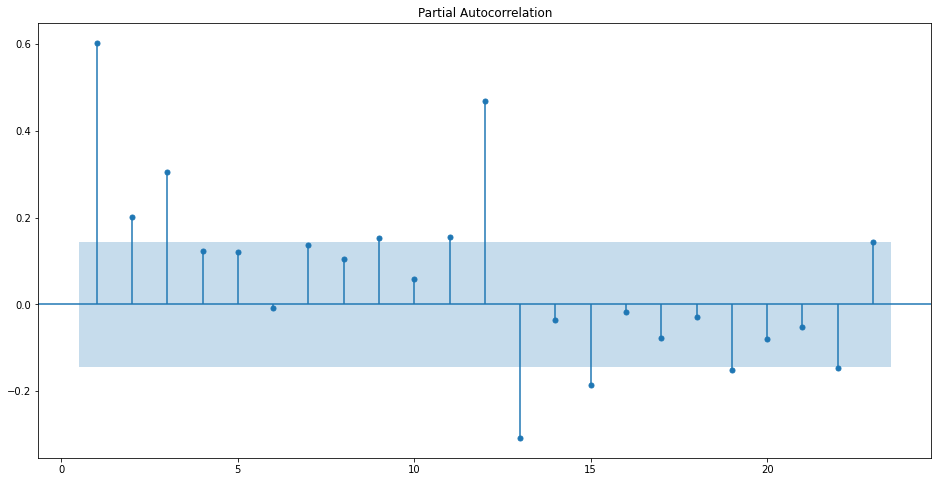

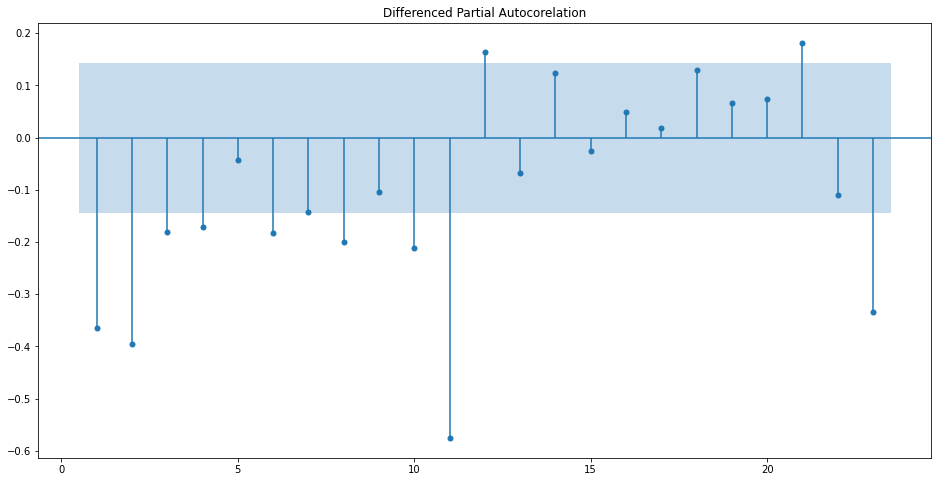

In [264]:
plot_pacf(df1,zero=False, alpha=0.05);
plot_pacf(df1.diff().dropna(), zero=False, title='Differenced Partial Autocorelation');

In [265]:
train.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [267]:
train.shape

(132, 1)

In [268]:
test.shape

(55, 1)

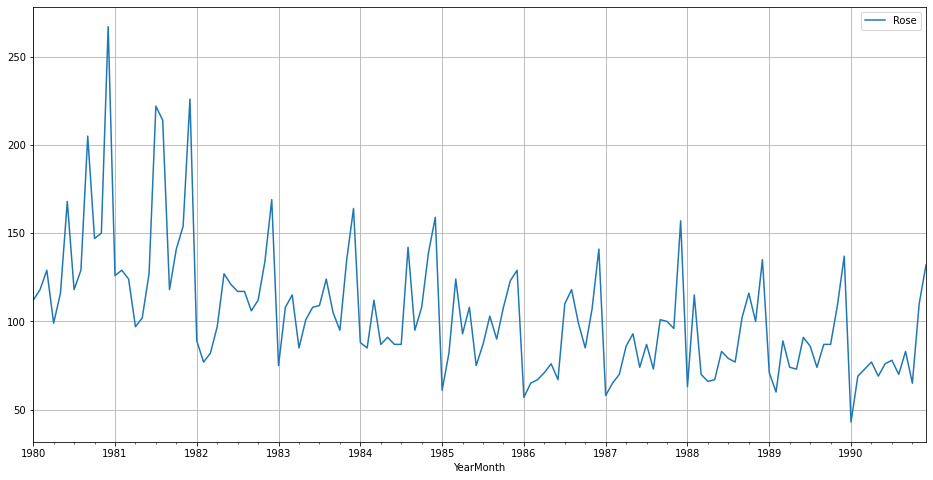

In [269]:
train.plot(grid=True);

In [270]:
dftest_train = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %dftest_train[0])
print('DF test p-value is' ,dftest_train[1])
print('Number of lags used' ,dftest_train[2])

DF test statistic is -1.686
DF test p-value is 0.7569093051047033
Number of lags used 13


In [273]:
dftest_train1 = adfuller(train.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest_train1[0])
print('DF test p-value is' ,dftest_train1[1])
print('Number of lags used' ,dftest_train1[2])

DF test statistic is -6.804
DF test p-value is 3.894831356782385e-08
Number of lags used 12


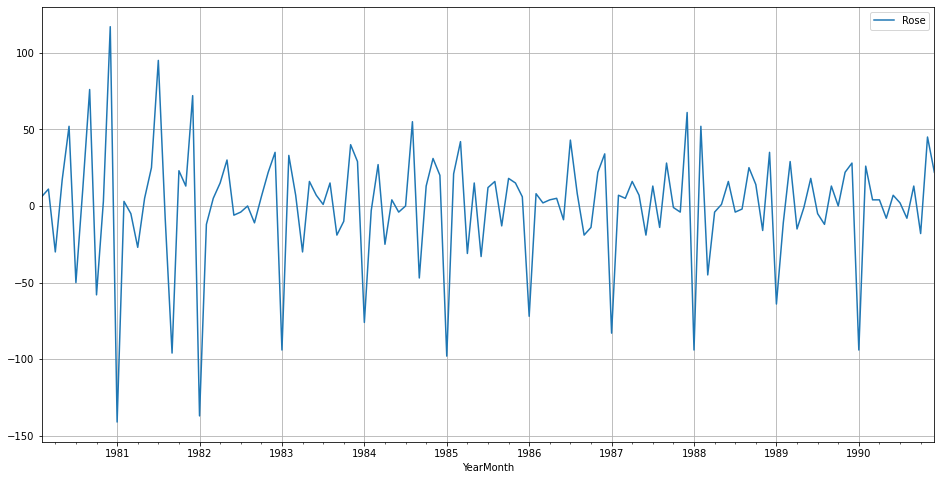

In [274]:
train.diff().dropna().plot(grid=True);

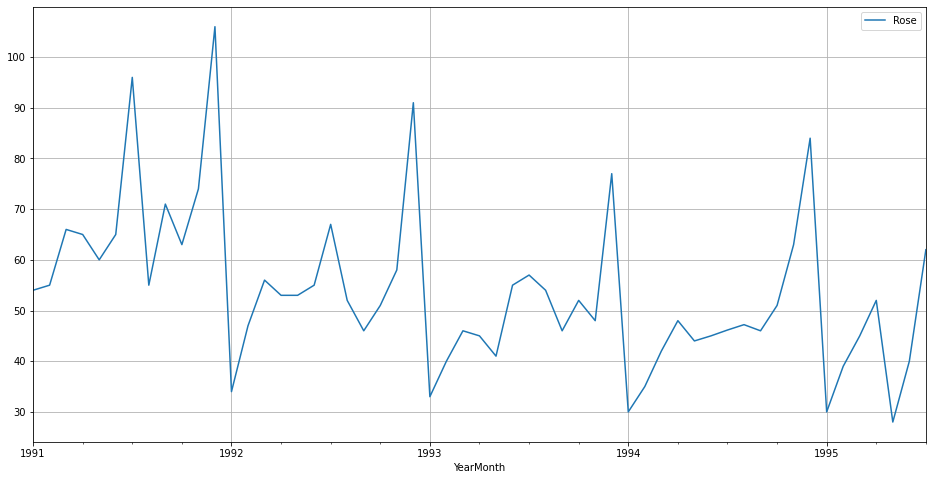

In [271]:
test.plot(grid=True);

In [275]:
dftest_test = adfuller(test,regression='ct')
print('DF test statistic is %3.3f' %dftest_test[0])
print('DF test p-value is' ,dftest_test[1])
print('Number of lags used' ,dftest_test[2])

DF test statistic is -1.072
DF test p-value is 0.9336488528568629
Number of lags used 11


In [276]:
dftest_test1 = adfuller(test.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest_test1[0])
print('DF test p-value is' ,dftest_test1[1])
print('Number of lags used' ,dftest_test1[2])

DF test statistic is -11.587
DF test p-value is 1.8927376304346098e-18
Number of lags used 10


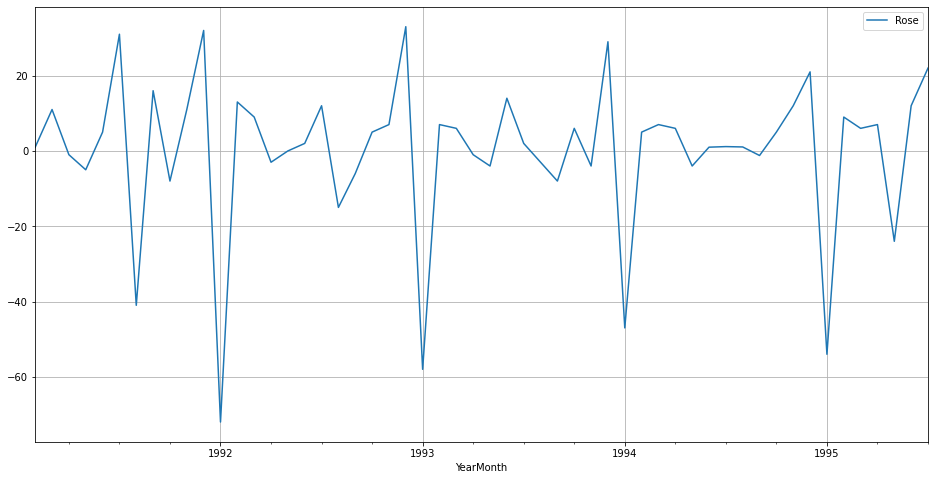

In [277]:
test.diff().dropna().plot(grid=True);

In [278]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-01 to 1990-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    132 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


In [279]:
import itertools

In [280]:
p=q=range(0,4)
d=range(1,2)
pdq=list(itertools.product(p, d, q))
print('Some parameter combinations of Model:')
for i in range(0, len(pdq)):
    print('Model : {}'.format(pdq[i]))

Some parameter combinations of Model:
Model : (0, 1, 0)
Model : (0, 1, 1)
Model : (0, 1, 2)
Model : (0, 1, 3)
Model : (1, 1, 0)
Model : (1, 1, 1)
Model : (1, 1, 2)
Model : (1, 1, 3)
Model : (2, 1, 0)
Model : (2, 1, 1)
Model : (2, 1, 2)
Model : (2, 1, 3)
Model : (3, 1, 0)
Model : (3, 1, 1)
Model : (3, 1, 2)
Model : (3, 1, 3)


In [281]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [282]:
from statsmodels.tsa.arima.model import ARIMA

In [283]:
for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values, order=param).fit()
    print('ARIMA{}-AIC:{}'.format(param, ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC':ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0)-AIC:1333.1546729124348
ARIMA(0, 1, 1)-AIC:1282.3098319748299
ARIMA(0, 1, 2)-AIC:1279.671528853578
ARIMA(0, 1, 3)-AIC:1280.5453761734655
ARIMA(1, 1, 0)-AIC:1317.3503105381546
ARIMA(1, 1, 1)-AIC:1280.5742295380069
ARIMA(1, 1, 2)-AIC:1279.8707234231915
ARIMA(1, 1, 3)-AIC:1281.870722330997
ARIMA(2, 1, 0)-AIC:1298.611034160493
ARIMA(2, 1, 1)-AIC:1281.5078621868445
ARIMA(2, 1, 2)-AIC:1281.870722226406


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3)-AIC:1274.6951249065105
ARIMA(3, 1, 0)-AIC:1297.4810917271743
ARIMA(3, 1, 1)-AIC:1282.4192776271914


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 1, 2)-AIC:1283.720740597715


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 1, 3)-AIC:1278.6638707697466


In [366]:
ARIMA_AIC.sort_values(by=['AIC'], ascending=True)

,param,AIC
11,"(2, 1, 3)",1274.695125
15,"(3, 1, 3)",1278.663871
2,"(0, 1, 2)",1279.671529
6,"(1, 1, 2)",1279.870723
3,"(0, 1, 3)",1280.545376
5,"(1, 1, 1)",1280.574230
9,"(2, 1, 1)",1281.507862
10,"(2, 1, 2)",1281.870722
7,"(1, 1, 3)",1281.870722
1,"(0, 1, 1)",1282.309832


In [295]:
auto_ARIMA = ARIMA(train['Rose'], order=(2,1,3))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.348
Date:                Fri, 18 Feb 2022   AIC                           1274.695
Time:                        20:29:37   BIC                           1291.946
Sample:                    01-01-1980   HQIC                          1281.705
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6779      0.084    -20.050      0.000      -1.842      -1.514
ar.L2         -0.7289      0.084     -8.710      0.000      -0.893      -0.565
ma.L1          1.0448      0.663      1.576      0.1

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


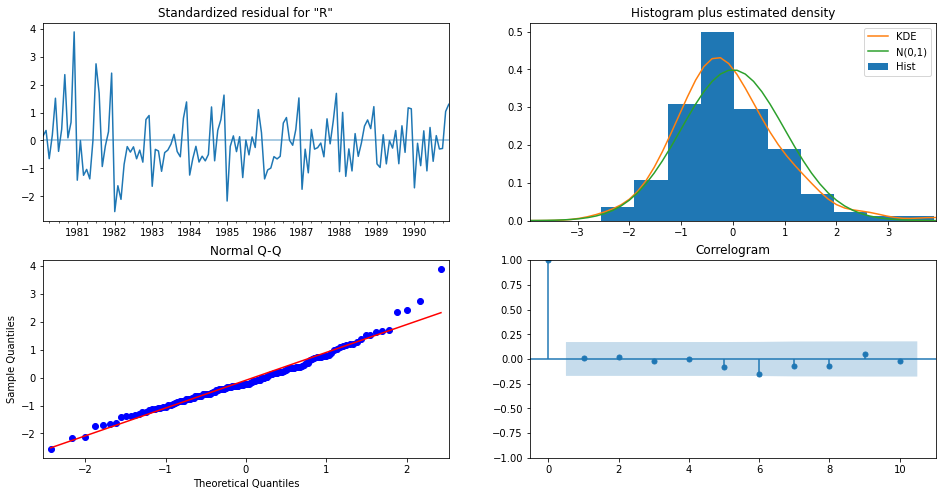

In [300]:
results_auto_ARIMA.plot_diagnostics();

In [296]:
predict_auto_ARIMA = results_auto_ARIMA.forecast(len(test))

In [297]:
rmse_ARIMA = metrics.mean_squared_error(test['Rose'], predict_auto_ARIMA, squared=False)
print(rmse_ARIMA)

36.768033438212875


In [298]:
result_ARIMA= pd.DataFrame({'RMSE': (rmse_ARIMA)}, index=['ARIMA(2, 1, 3)'])

resultRose = pd.concat([resultRose, result_ARIMA])
resultRose

,RMSE
RegressionOnTime,15.255492
Naive Model,79.672475
Simple Average Model,53.413298
2-P Moving Average,11.529985
4-P Moving Average,14.444375
6-P Moving Average,14.554986
9-P Moving Average,14.721520
Alpha=0.098 Simple Exp-Smoothing,36.748398
"Alpha=0.04, Beta=0.04, Double Exp-Smoothing",14.906969
"Alpha=0.1, Beta=0.2,Gamma=0.2 Triple Exp-Smoothing",9.628012


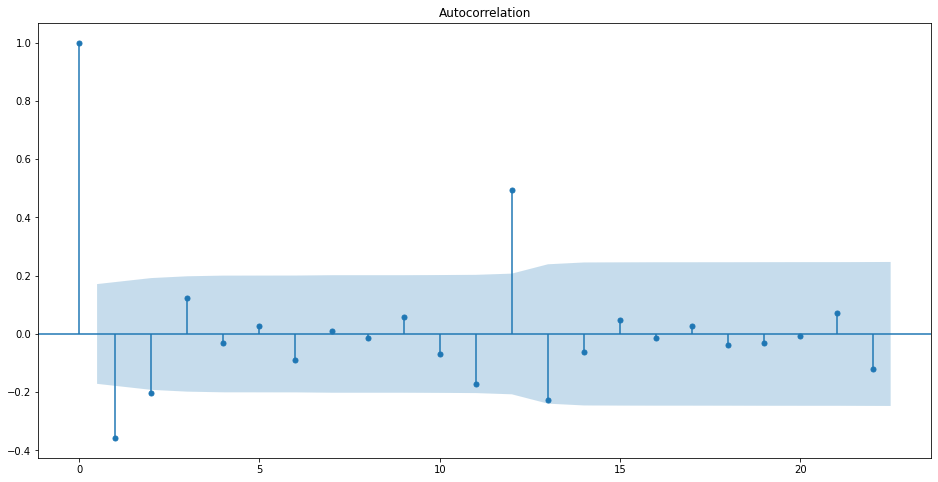

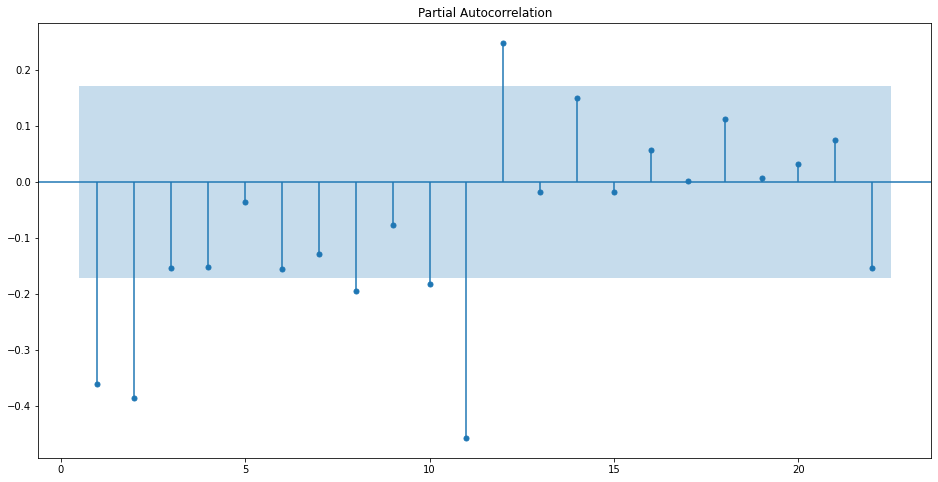

In [303]:
plot_acf(train.diff().dropna())
plot_pacf(train.diff().dropna(), zero=False)
plt.show();

In [305]:
#p=q=2 from the above graph and d=1

In [306]:
manual_ARIMA = ARIMA(train['Rose'], order=(2,1,2))
results_manual_ARIMA = manual_ARIMA.fit()
print(results_manual_ARIMA.summary())

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -635.935
Date:                Fri, 18 Feb 2022   AIC                           1281.871
Time:                        20:40:30   BIC                           1296.247
Sample:                    01-01-1980   HQIC                          1287.712
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4540      0.469     -0.969      0.333      -1.372       0.464
ar.L2          0.0001      0.170      0.001      0.999      -0.334       0.334
ma.L1         -0.2541      0.459     -0.554      0.5

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


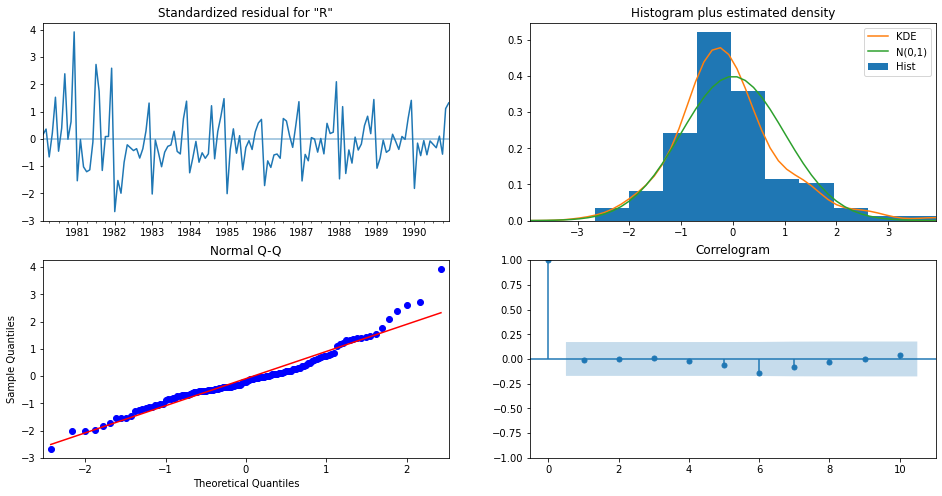

In [307]:
results_manual_ARIMA.plot_diagnostics();

In [309]:
predict_manual_ARIMA = results_manual_ARIMA.forecast(len(test))

In [312]:
rmse_mARIMA = metrics.mean_squared_error(test['Rose'], predict_manual_ARIMA, squared=False)
print(rmse_mARIMA)

36.82342005656333


In [313]:
resultsmARIMA = pd.DataFrame({'RMSE': (rmse_mARIMA)}, index=['ARIMA(2,1,2)'])

resultRose = pd.concat([resultRose, resultsmARIMA])
resultRose

,RMSE
RegressionOnTime,15.255492
Naive Model,79.672475
Simple Average Model,53.413298
2-P Moving Average,11.529985
4-P Moving Average,14.444375
6-P Moving Average,14.554986
9-P Moving Average,14.721520
Alpha=0.098 Simple Exp-Smoothing,36.748398
"Alpha=0.04, Beta=0.04, Double Exp-Smoothing",14.906969
"Alpha=0.1, Beta=0.2,Gamma=0.2 Triple Exp-Smoothing",9.628012


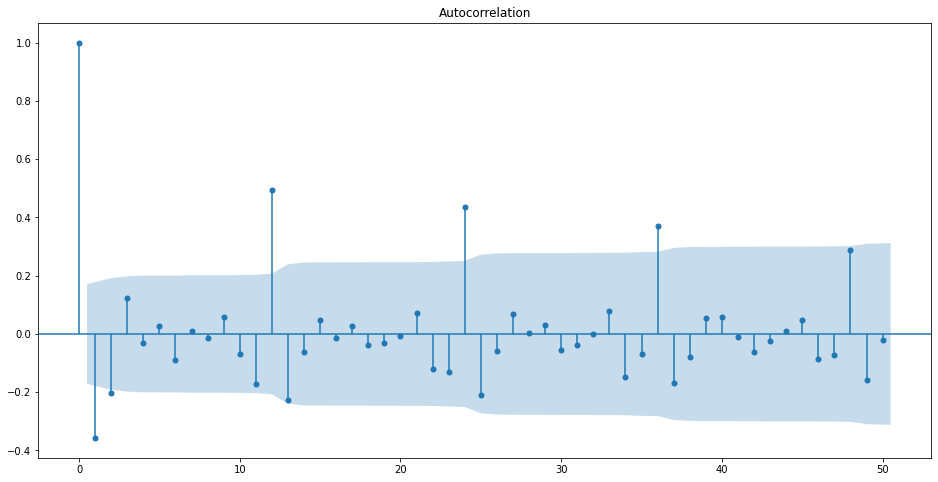

In [315]:
plot_acf(train.diff().dropna(), lags=50);

In [316]:
#seasonality = 12

In [317]:
p=q=range(0,4)
d=range(1,2)
D=range(0,1)
pdq=list(itertools.product(p,d,q))
PDQ=[(x[0], x[1], x[2],12) for x in list(itertools.product(p,D,q))]
print('Examples of the parameter combintions for the model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i],PDQ[i]))

Examples of the parameter combintions for the model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [318]:
SARIMA_AIC =pd.DataFrame(columns=['param','seasonal','AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [320]:
import statsmodels.api as sm

In [321]:
for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                                order=param, seasonal_order=param_seasonal,
                                                enforce_stationarity=False,enforce_invertibility=False)
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal,results_SARIMA.aic))
        SARIMA_AIC  = SARIMA_AIC.append({'param':param,'param_seasonal':param_seasonal,'AIC':results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.4230827207318
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380894


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:4021.076950654957
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.02078693863
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635752877
SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:2504.402831731293


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.879454069752
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945565


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:3677.3634520100545
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:850.7535403931095
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:851.7482702730924
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:850.5304136128095


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:3530.067805557076
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918343
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383775


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(0, 0, 3, 12) - AIC:3807.198510938323
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.7936324918392
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.7434330947092
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483300944
SARIMA(0, 1, 1)x(1, 0, 3, 12) - AIC:5540.648396450524
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866535984
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461668
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.1988259675


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(2, 0, 3, 12) - AIC:3580.8018599573866
SARIMA(0, 1, 1)x(3, 0, 0, 12) - AIC:798.5889764809137
SARIMA(0, 1, 1)x(3, 0, 1, 12) - AIC:800.4844940751196
SARIMA(0, 1, 1)x(3, 0, 2, 12) - AIC:801.0595269370963


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(3, 0, 3, 12) - AIC:3447.539743730167
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:1251.6675430541045
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1083.486697526495
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:913.4938486617698


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(0, 0, 3, 12) - AIC:2601.2109834974704
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1088.8332843413477
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1045.5400933591723
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:904.8310913475235


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(1, 0, 3, 12) - AIC:3814.1118121289546
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:913.0105912257984
SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:914.1707545063757
SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:887.9375085680113


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(2, 0, 3, 12) - AIC:2532.372391463606
SARIMA(0, 1, 2)x(3, 0, 0, 12) - AIC:800.1020189374595
SARIMA(0, 1, 2)x(3, 0, 1, 12) - AIC:801.9941080533771
SARIMA(0, 1, 2)x(3, 0, 2, 12) - AIC:802.5206528238947


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(3, 0, 3, 12) - AIC:2384.607706752674
SARIMA(0, 1, 3)x(0, 0, 0, 12) - AIC:1243.9501216739097
SARIMA(0, 1, 3)x(0, 0, 1, 12) - AIC:1076.7632646080267
SARIMA(0, 1, 3)x(0, 0, 2, 12) - AIC:905.692653338096


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(0, 0, 3, 12) - AIC:3454.4631389732185
SARIMA(0, 1, 3)x(1, 0, 0, 12) - AIC:1089.2051361212248
SARIMA(0, 1, 3)x(1, 0, 1, 12) - AIC:1034.8411212936567
SARIMA(0, 1, 3)x(1, 0, 2, 12) - AIC:896.836252334202
SARIMA(0, 1, 3)x(1, 0, 3, 12) - AIC:2633.5697938019484
SARIMA(0, 1, 3)x(2, 0, 0, 12) - AIC:914.947710898705
SARIMA(0, 1, 3)x(2, 0, 1, 12) - AIC:916.0630996891467
SARIMA(0, 1, 3)x(2, 0, 2, 12) - AIC:880.5509788253753


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(2, 0, 3, 12) - AIC:3465.2362872885496
SARIMA(0, 1, 3)x(3, 0, 0, 12) - AIC:802.098712476544
SARIMA(0, 1, 3)x(3, 0, 1, 12) - AIC:803.9928772350564
SARIMA(0, 1, 3)x(3, 0, 2, 12) - AIC:804.5150728193369


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(3, 0, 3, 12) - AIC:3020.4697208111384
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:1308.161871082466
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1135.2955447585712
SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:963.9405391257689


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(0, 0, 3, 12) - AIC:3643.9383318596565
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1124.886078680456
SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1105.4080055024053
SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:958.5001972948671


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(1, 0, 3, 12) - AIC:4555.024921008298
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:939.0984778664093
SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:940.9087133661066
SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:942.2973103071481


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(2, 0, 3, 12) - AIC:3429.6562119459604
SARIMA(1, 1, 0)x(3, 0, 0, 12) - AIC:819.3931032272546
SARIMA(1, 1, 0)x(3, 0, 1, 12) - AIC:821.1501371573657
SARIMA(1, 1, 0)x(3, 0, 2, 12) - AIC:819.130508768187


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(3, 0, 3, 12) - AIC:3274.063034946624
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:1262.1840064255503
SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1094.3172708640745
SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:923.086222406388
SARIMA(1, 1, 1)x(0, 0, 3, 12) - AIC:3912.7882294621377
SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1083.3937965029213
SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1054.7180547138148
SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:916.3549428513388


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(1, 0, 3, 12) - AIC:2856.587615064888
SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:905.9249060843123
SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:907.2972867470809
SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:900.6725795936919


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(2, 0, 3, 12) - AIC:2761.666978595988
SARIMA(1, 1, 1)x(3, 0, 0, 12) - AIC:789.2360439390588
SARIMA(1, 1, 1)x(3, 0, 1, 12) - AIC:790.9603447847194
SARIMA(1, 1, 1)x(3, 0, 2, 12) - AIC:790.8113850239979
SARIMA(1, 1, 1)x(3, 0, 3, 12) - AIC:3553.128562078647
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:1251.94950407062
SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:1085.4861928100963
SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:915.4938403924011


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(0, 0, 3, 12) - AIC:3798.120486832744
SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1090.7760921846095
SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1042.6183212340582
SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:906.7318503309523


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 0, 3, 12) - AIC:2554.7205233524182
SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:906.1690196393979
SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:907.4597827407234
SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:896.6868967505502


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:3568.9157547133273
SARIMA(1, 1, 2)x(3, 0, 0, 12) - AIC:791.0073801466897
SARIMA(1, 1, 2)x(3, 0, 1, 12) - AIC:792.6312805827572
SARIMA(1, 1, 2)x(3, 0, 2, 12) - AIC:792.1390247700549


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 0, 3, 12) - AIC:3443.6358323565587
SARIMA(1, 1, 3)x(0, 0, 0, 12) - AIC:1245.5463125316492
SARIMA(1, 1, 3)x(0, 0, 1, 12) - AIC:1072.9849769489583
SARIMA(1, 1, 3)x(0, 0, 2, 12) - AIC:907.4130105132072
SARIMA(1, 1, 3)x(0, 0, 3, 12) - AIC:3730.3653388708235
SARIMA(1, 1, 3)x(1, 0, 0, 12) - AIC:1082.3281487676738
SARIMA(1, 1, 3)x(1, 0, 1, 12) - AIC:1036.1950928976266
SARIMA(1, 1, 3)x(1, 0, 2, 12) - AIC:897.5232291658302


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(1, 0, 3, 12) - AIC:2408.353083612292
SARIMA(1, 1, 3)x(2, 0, 0, 12) - AIC:908.2687612373375
SARIMA(1, 1, 3)x(2, 0, 1, 12) - AIC:909.7955659202015
SARIMA(1, 1, 3)x(2, 0, 2, 12) - AIC:880.2886597569244


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(2, 0, 3, 12) - AIC:3208.6878926448467
SARIMA(1, 1, 3)x(3, 0, 0, 12) - AIC:792.9903133860167
SARIMA(1, 1, 3)x(3, 0, 1, 12) - AIC:794.6310143357572
SARIMA(1, 1, 3)x(3, 0, 2, 12) - AIC:794.0467935791318


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(3, 0, 3, 12) - AIC:2471.4962693569396
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:1280.253756153577
SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1128.77737047111
SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:958.0793208829945
SARIMA(2, 1, 0)x(0, 0, 3, 12) - AIC:3954.7321889211207
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1099.5086021575926
SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1076.7863198641157
SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:951.198816555895


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(1, 0, 3, 12) - AIC:2551.6151102400145
SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:924.6004792645552
SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:925.9757801384267
SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:927.8380693280798
SARIMA(2, 1, 0)x(2, 0, 3, 12) - AIC:3724.640155328284
SARIMA(2, 1, 0)x(3, 0, 0, 12) - AIC:806.0536407408753
SARIMA(2, 1, 0)x(3, 0, 1, 12) - AIC:808.0472637903027
SARIMA(2, 1, 0)x(3, 0, 2, 12) - AIC:806.4988191371573


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(3, 0, 3, 12) - AIC:3802.5186345994684
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:1263.231523179832
SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1094.2093491949356
SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:922.9408472085613


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(0, 0, 3, 12) - AIC:3683.864076673139
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1071.424960110146
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1052.9244471204624
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:916.2424912822576


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:2922.5652011471484
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:896.5181608226212
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:897.6399565369657
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:899.4835866294104
SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:2901.7934602904834
SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:785.393260026534
SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:787.3639258835329
SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:787.059888704168


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:3496.4749066913346
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:1253.9102116146667
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1085.9643552598188
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:916.3258311118051


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:3548.0015961090403
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1073.2912713712085
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1044.1909353929373
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:907.6661488806633
SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:2419.8084335527
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:897.3464442147072
SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:898.3781889000771
SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:890.6687980850581


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 0, 3, 12) - AIC:3314.397830929596
SARIMA(2, 1, 2)x(3, 0, 0, 12) - AIC:785.1199713127903
SARIMA(2, 1, 2)x(3, 0, 1, 12) - AIC:786.9410035352612
SARIMA(2, 1, 2)x(3, 0, 2, 12) - AIC:786.9640483355886


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(3, 0, 3, 12) - AIC:3102.2823064015315
SARIMA(2, 1, 3)x(0, 0, 0, 12) - AIC:1237.870348108901
SARIMA(2, 1, 3)x(0, 0, 1, 12) - AIC:1067.8073333343652
SARIMA(2, 1, 3)x(0, 0, 2, 12) - AIC:908.3349281707707


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(0, 0, 3, 12) - AIC:3813.2201444453817
SARIMA(2, 1, 3)x(1, 0, 0, 12) - AIC:1073.2563238320072
SARIMA(2, 1, 3)x(1, 0, 1, 12) - AIC:1024.046197011455
SARIMA(2, 1, 3)x(1, 0, 2, 12) - AIC:890.9483353882234


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(1, 0, 3, 12) - AIC:2990.001653626098
SARIMA(2, 1, 3)x(2, 0, 0, 12) - AIC:893.3579301575435
SARIMA(2, 1, 3)x(2, 0, 1, 12) - AIC:903.2328064671816
SARIMA(2, 1, 3)x(2, 0, 2, 12) - AIC:879.2191799260027


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(2, 0, 3, 12) - AIC:3593.34217742532
SARIMA(2, 1, 3)x(3, 0, 0, 12) - AIC:782.4074208030854
SARIMA(2, 1, 3)x(3, 0, 1, 12) - AIC:783.4101469128286
SARIMA(2, 1, 3)x(3, 0, 2, 12) - AIC:781.0452533286057


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(3, 0, 3, 12) - AIC:3471.0591288494043
SARIMA(3, 1, 0)x(0, 0, 0, 12) - AIC:1269.8130062641503
SARIMA(3, 1, 0)x(0, 0, 1, 12) - AIC:1119.170315804222
SARIMA(3, 1, 0)x(0, 0, 2, 12) - AIC:953.344058911803
SARIMA(3, 1, 0)x(0, 0, 3, 12) - AIC:3956.7321889186533
SARIMA(3, 1, 0)x(1, 0, 0, 12) - AIC:1080.5468456725998
SARIMA(3, 1, 0)x(1, 0, 1, 12) - AIC:1065.5569726783601
SARIMA(3, 1, 0)x(1, 0, 2, 12) - AIC:943.6865996304713


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(1, 0, 3, 12) - AIC:2542.983163236001
SARIMA(3, 1, 0)x(2, 0, 0, 12) - AIC:909.7203197969602
SARIMA(3, 1, 0)x(2, 0, 1, 12) - AIC:911.0620713976475
SARIMA(3, 1, 0)x(2, 0, 2, 12) - AIC:913.0438816472908


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(2, 0, 3, 12) - AIC:2382.8139037145
SARIMA(3, 1, 0)x(3, 0, 0, 12) - AIC:796.0564701527121
SARIMA(3, 1, 0)x(3, 0, 1, 12) - AIC:795.5410167663339
SARIMA(3, 1, 0)x(3, 0, 2, 12) - AIC:794.6677017236581


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(3, 0, 3, 12) - AIC:3420.4698767657587
SARIMA(3, 1, 1)x(0, 0, 0, 12) - AIC:1255.0658180709345
SARIMA(3, 1, 1)x(0, 0, 1, 12) - AIC:1095.6894641202734
SARIMA(3, 1, 1)x(0, 0, 2, 12) - AIC:923.8872427547288


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(0, 0, 3, 12) - AIC:3685.8640766731173
SARIMA(3, 1, 1)x(1, 0, 0, 12) - AIC:1064.6149136500699
SARIMA(3, 1, 1)x(1, 0, 1, 12) - AIC:1046.0837555075163
SARIMA(3, 1, 1)x(1, 0, 2, 12) - AIC:917.0308009384257


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(1, 0, 3, 12) - AIC:3551.2218434157567
SARIMA(3, 1, 1)x(2, 0, 0, 12) - AIC:887.3204459899039
SARIMA(3, 1, 1)x(2, 0, 1, 12) - AIC:888.3279208538104
SARIMA(3, 1, 1)x(2, 0, 2, 12) - AIC:890.1571523416055
SARIMA(3, 1, 1)x(2, 0, 3, 12) - AIC:3496.2722880256356
SARIMA(3, 1, 1)x(3, 0, 0, 12) - AIC:775.426699025961
SARIMA(3, 1, 1)x(3, 0, 1, 12) - AIC:775.4953300794233
SARIMA(3, 1, 1)x(3, 0, 2, 12) - AIC:774.4002872868334


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(3, 0, 3, 12) - AIC:3670.1996578917956
SARIMA(3, 1, 2)x(0, 0, 0, 12) - AIC:1255.983565639513
SARIMA(3, 1, 2)x(0, 0, 1, 12) - AIC:1086.7092403729098
SARIMA(3, 1, 2)x(0, 0, 2, 12) - AIC:917.7980110640929


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(0, 0, 3, 12) - AIC:3827.7714756283895
SARIMA(3, 1, 2)x(1, 0, 0, 12) - AIC:1066.2776211149624
SARIMA(3, 1, 2)x(1, 0, 1, 12) - AIC:1046.1260520456772
SARIMA(3, 1, 2)x(1, 0, 2, 12) - AIC:909.2875100282831


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(1, 0, 3, 12) - AIC:2361.735902867593
SARIMA(3, 1, 2)x(2, 0, 0, 12) - AIC:889.3186092497481
SARIMA(3, 1, 2)x(2, 0, 1, 12) - AIC:890.3277441231701
SARIMA(3, 1, 2)x(2, 0, 2, 12) - AIC:896.1484295644921


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(2, 0, 3, 12) - AIC:3843.297161312008
SARIMA(3, 1, 2)x(3, 0, 0, 12) - AIC:777.25056493205
SARIMA(3, 1, 2)x(3, 0, 1, 12) - AIC:776.3462132339802
SARIMA(3, 1, 2)x(3, 0, 2, 12) - AIC:774.8809368473624


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(3, 0, 3, 12) - AIC:3768.3717817626684
SARIMA(3, 1, 3)x(0, 0, 0, 12) - AIC:1243.7385968731587
SARIMA(3, 1, 3)x(0, 0, 1, 12) - AIC:1060.5397685387939
SARIMA(3, 1, 3)x(0, 0, 2, 12) - AIC:910.3340160175035


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(0, 0, 3, 12) - AIC:3794.051483355002
SARIMA(3, 1, 3)x(1, 0, 0, 12) - AIC:1066.8459370475061
SARIMA(3, 1, 3)x(1, 0, 1, 12) - AIC:1039.766238075059
SARIMA(3, 1, 3)x(1, 0, 2, 12) - AIC:900.0483683813802


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(1, 0, 3, 12) - AIC:2481.3902100958258
SARIMA(3, 1, 3)x(2, 0, 0, 12) - AIC:884.0463713602348
SARIMA(3, 1, 3)x(2, 0, 1, 12) - AIC:885.9217097330054
SARIMA(3, 1, 3)x(2, 0, 2, 12) - AIC:880.5595622022186
SARIMA(3, 1, 3)x(2, 0, 3, 12) - AIC:3460.627362289443
SARIMA(3, 1, 3)x(3, 0, 0, 12) - AIC:775.5610185000982
SARIMA(3, 1, 3)x(3, 0, 1, 12) - AIC:776.3690406055308
SARIMA(3, 1, 3)x(3, 0, 2, 12) - AIC:778.2316174328649


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(3, 0, 3, 12) - AIC:2695.0838241534198


In [368]:
SARIMA_AIC.sort_values(by=['AIC'], ascending=True).head(10)

,param,seasonal,AIC,param_seasonal
222,"(3, 1, 1)",NaN,774.400287,"(3, 0, 2, 12)"
238,"(3, 1, 2)",NaN,774.880937,"(3, 0, 2, 12)"
220,"(3, 1, 1)",NaN,775.426699,"(3, 0, 0, 12)"
221,"(3, 1, 1)",NaN,775.495330,"(3, 0, 1, 12)"
252,"(3, 1, 3)",NaN,775.561019,"(3, 0, 0, 12)"
237,"(3, 1, 2)",NaN,776.346213,"(3, 0, 1, 12)"
253,"(3, 1, 3)",NaN,776.369041,"(3, 0, 1, 12)"
236,"(3, 1, 2)",NaN,777.250565,"(3, 0, 0, 12)"
254,"(3, 1, 3)",NaN,778.231617,"(3, 0, 2, 12)"
190,"(2, 1, 3)",NaN,781.045253,"(3, 0, 2, 12)"


In [323]:
auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'], order=(3, 1, 1),
                                       seasonal_order=(3, 0, 2,12),
                                       enforce_stationarity=False,
                                       enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                        SARIMAX Results                                        
Dep. Variable:                                    Rose   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 0, [1, 2], 12)   Log Likelihood                -377.200
Date:                                 Fri, 18 Feb 2022   AIC                            774.400
Time:                                         21:33:24   BIC                            799.618
Sample:                                     01-01-1980   HQIC                           784.578
                                          - 12-01-1990                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0464      0.126      0.367      0.714      -0.201       0

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


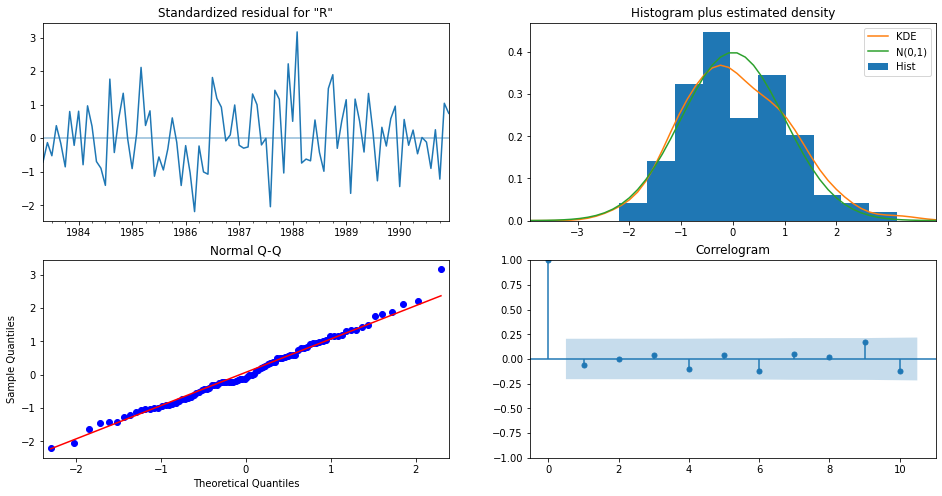

In [324]:
results_auto_SARIMA.plot_diagnostics();

In [325]:
predict_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [326]:
predict_auto_SARIMA.summary_frame(alpha=0.05).head()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1991-01-01,55.237900,13.907064,27.980554,82.495245
1991-02-01,68.121913,13.990527,40.700984,95.542842
1991-03-01,67.909504,14.011581,40.447311,95.371698
1991-04-01,66.786298,14.098889,39.152983,94.419613
1991-05-01,69.761700,14.108248,42.110042,97.413358


In [330]:
rmse_SARIMA = metrics.mean_squared_error(test['Rose'], predict_auto_SARIMA.predicted_mean, squared=False)
print(rmse_SARIMA)

18.833724021145272


In [332]:
result_SARIMA = pd.DataFrame({'RMSE': (rmse_SARIMA)}, index=['SARIMA(3, 1, 1)(3, 0, 2, 12)'])
resultRose=pd.concat([resultRose,result_SARIMA])
resultRose

,RMSE
RegressionOnTime,15.255492
Naive Model,79.672475
Simple Average Model,53.413298
2-P Moving Average,11.529985
4-P Moving Average,14.444375
6-P Moving Average,14.554986
9-P Moving Average,14.721520
Alpha=0.098 Simple Exp-Smoothing,36.748398
"Alpha=0.04, Beta=0.04, Double Exp-Smoothing",14.906969
"Alpha=0.1, Beta=0.2,Gamma=0.2 Triple Exp-Smoothing",9.628012


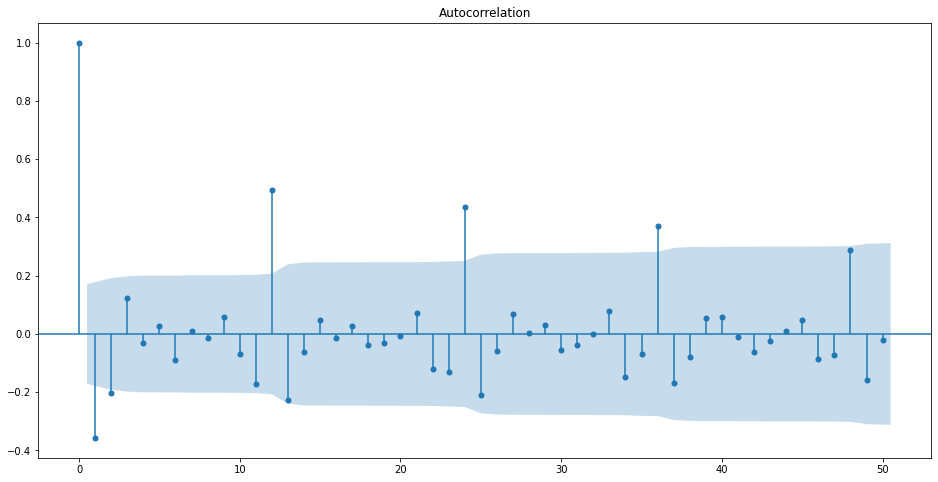

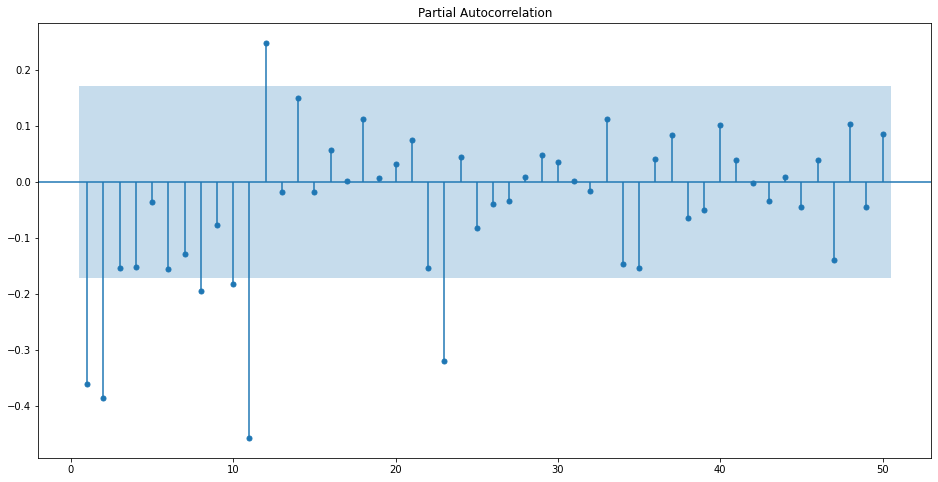

In [333]:
plot_acf(train.diff().dropna(),lags=50)
plot_pacf(train.diff().dropna(), zero=False, lags=50)
plt.show();

In [338]:
manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(2,1,2),
                                seasonal_order=(0, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(0, 0, 2, 12)   Log Likelihood                -451.163
Date:                            Fri, 18 Feb 2022   AIC                            916.326
Time:                                    21:59:36   BIC                            934.837
Sample:                                01-01-1980   HQIC                           923.825
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4332      0.471      0.920      0.358      -0.490       1.356
ar.L2         -0.1537      0.122   

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


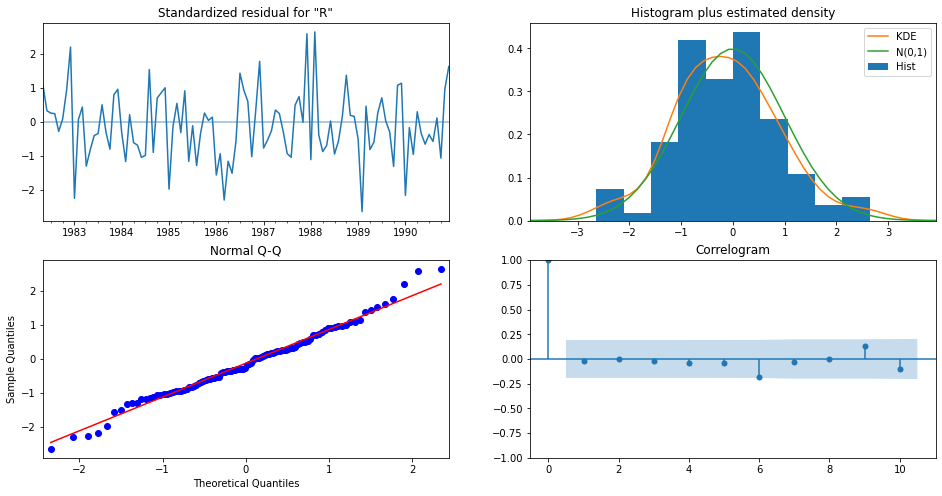

In [339]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

In [340]:
predict_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [341]:
rmse_mSARIMA = metrics.mean_squared_error(test['Rose'], predict_manual_SARIMA.predicted_mean, squared=False)
print(rmse_mSARIMA)

30.086447551487904


In [342]:
result_man_SARIMA = pd.DataFrame({'RMSE': (rmse_mSARIMA)}, index=['SARIMA(2, 1, 2)(0, 0, 2, 12)'])
resultRose=pd.concat([resultRose,result_man_SARIMA])
resultRose

,RMSE
RegressionOnTime,15.255492
Naive Model,79.672475
Simple Average Model,53.413298
2-P Moving Average,11.529985
4-P Moving Average,14.444375
6-P Moving Average,14.554986
9-P Moving Average,14.721520
Alpha=0.098 Simple Exp-Smoothing,36.748398
"Alpha=0.04, Beta=0.04, Double Exp-Smoothing",14.906969
"Alpha=0.1, Beta=0.2,Gamma=0.2 Triple Exp-Smoothing",9.628012


In [343]:
resultRose.sort_values(by='RMSE', ascending=True)

,RMSE
"Alpha=0.1, Beta=0.2,Gamma=0.2 Triple Exp-Smoothing",9.628012
2-P Moving Average,11.529985
4-P Moving Average,14.444375
6-P Moving Average,14.554986
9-P Moving Average,14.721520
"Alpha=0.04, Beta=0.04, Double Exp-Smoothing",14.906969
RegressionOnTime,15.255492
"SARIMA(3, 1, 1)(3, 0, 2, 12)",18.833724
"SARIMA(2, 1, 2)(0, 0, 2, 12)",30.086448
Alpha=0.098 Simple Exp-Smoothing,36.748398


In [345]:
fullmodel1 = ExponentialSmoothing(df1,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.1,
                                                                 smoothing_trend=0.2,
                                                                 smoothing_seasonal=0.2)

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [346]:
RMSE_fullmodel1 = metrics.mean_squared_error(df1['Rose'],fullmodel1.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel1)

RMSE: 17.401030688080066


In [350]:
prediction_1 = fullmodel1.forecast(steps=12)

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [370]:
prediction_1

1995-08-01    48.027146
1995-09-01    48.319651
1995-10-01    50.294057
1995-11-01    58.455624
1995-12-01    82.095526
1996-01-01    31.683779
1996-02-01    39.404477
1996-03-01    45.318818
1996-04-01    46.745747
1996-05-01    40.681298
1996-06-01    46.928740
1996-07-01    54.163611
Freq: MS, dtype: float64

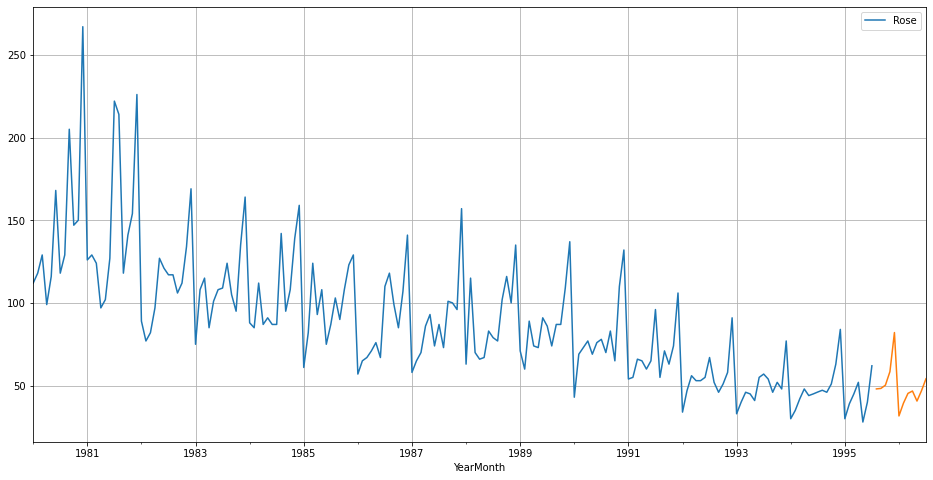

In [369]:
df1.plot()
prediction_1.plot(grid=True);

In [352]:
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df.head()

,lower_CI,prediction,upper_ci
1995-08-01,13.848303,48.027146,82.205988
1995-09-01,14.140808,48.319651,82.498493
1995-10-01,16.115215,50.294057,84.472900
1995-11-01,24.276782,58.455624,92.634467
1995-12-01,47.916684,82.095526,116.274369


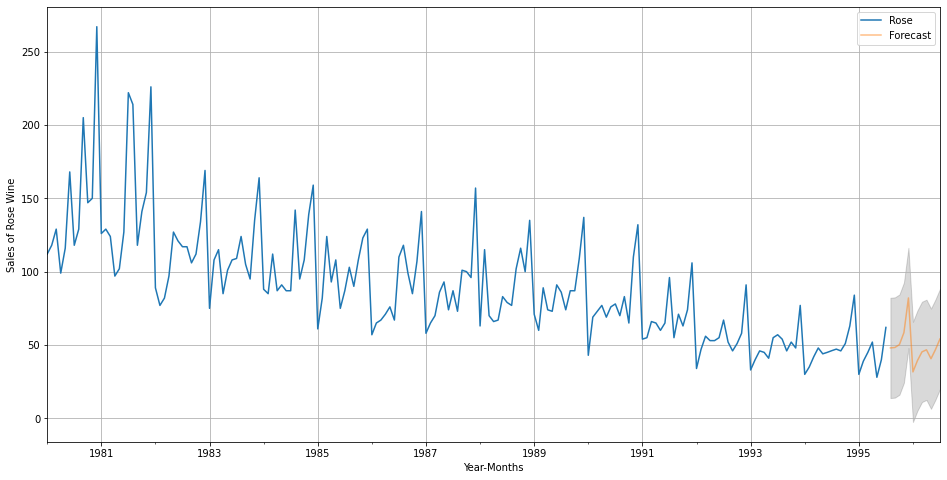

In [360]:
axis=df1.plot(label='Actual')
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales of Rose Wine')
plt.legend(loc='best')
plt.grid()
plt.show()

In [371]:
#The end